Objective:
To forecast the impact of the 'Eldrebølgen' (Aging Wave) on the demand for Sykepleier, Helsefagarbeider, and Hjelpepleier across Norway's regions.

Research Question:
How is the 'Eldrebølgen' expected to affect the demand for these healthcare professions in different regions of Norway?

Why Sykepleier, Helsefagarbeider, and Hjelpepleier?


Helsefagarbeider, Sykepleier, and Hjelpepleier are chosen for their pivotal roles in providing comprehensive, frontline care, especially to the elderly who are the most frequent users of healthcare services. Their versatility, accessibility, and foundational presence in the healthcare system make them critical in addressing the challenges posed by the 'Eldrebølgen'. Focusing on these professions provides valuable insights into the overall preparedness of the healthcare system to meet the rising demand and ensures that the quality of care for the aging population is maintained.

The research objective and question are pivotal in preparing for the inevitable challenges associated with the 'Eldrebølgen'. By anticipating changes in healthcare demand, Norway can proactively address potential shortages in healthcare staffing and ensure that the needs of its aging population are met.

Answering the So What?:


The necessity to address the demand for Helsefagarbeider, Sykepleier, and Hjelpepleier in anticipation of Norway's 'Eldrebølgen' is primarily a practical concern with far-reaching implications. The "so what?" factor lies in the tangible outcomes of this issue on our healthcare system and society at large.

The importance of these professions transcends their job descriptions; they are crucial in maintaining the quality of care for the elderly population. Adequately meeting the demand for these roles is essential for the sustainability of our healthcare services. A shortfall in these critical areas could result in strained healthcare resources, decreased quality of care, and potentially higher healthcare expenses.

Furthermore, the issue carries significant ethical weight. Providing sufficient care for the elderly is a societal responsibility and reflects our commitment to ensuring their well-being. The focus on Helsefagarbeider, Sykepleier, and Hjelpepleier is indicative of our societal resolve to support and care for our aging population. Essentially, the “so what?” is about pragmatic foresight. It's about recognizing and addressing the upcoming demographic changes proactively to ensure that our healthcare system remains robust and responsive to the needs of all citizens, especially the most vulnerable.






In [153]:
# Data processing and analysis
import pandas as pd
import numpy as np

# Plotting and visualization
import matplotlib.pyplot as plt

# Statistical modeling
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Machine Learning
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures


# Load the CSV file, skip initial rows if necessary, and specify the delimiter
data = pd.read_csv('/Users/lime/Desktop/Helse50.csv', delimiter=';', skiprows=1, header=1)


# Display the first few rows of the dataframe
data.head()


,K.3001 Halden,Hjelpepleier,Alle aldre,Fylkeskommunal forvaltning,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9,0.0.10,0.0.11,0.0.12,0.0.13,0.0.14
0,K.3001 Halden,Hjelpepleier,Alle aldre,Statsforvaltningen,6.0,28.0,22.0,22.0,22.0,27.0,27.0,24.0,26.0,27.0,20.0,17.0,22.0,22.0,12.0
1,K.3001 Halden,Hjelpepleier,Alle aldre,Privat sektor og offentlige foretak,22.0,20.0,22.0,25.0,25.0,25.0,29.0,23.0,22.0,24.0,25.0,23.0,26.0,24.0,12.0
2,K.3001 Halden,Hjelpepleier,Alle aldre,Uoppgitt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,K.3001 Halden,Helsefagarbeider,Alle aldre,Kommuneforvaltningen,0.0,140.5,10.0,23.0,31.0,84.0,124.0,128.0,153.0,169.0,169.0,191.0,214.0,240.0,262.0
4,K.3001 Halden,Helsefagarbeider,Alle aldre,Fylkeskommunal forvaltning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
print("Current columns in the DataFrame:", data.columns)
print("First few rows of the DataFrame:")
print(data.head())

Current columns in the DataFrame: Index(['K.3001 Halden', 'Hjelpepleier', 'Alle aldre',
       'Fylkeskommunal forvaltning', '0.0', '0.0.1', '0.0.2', '0.0.3', '0.0.4',
       '0.0.5', '0.0.6', '0.0.7', '0.0.8', '0.0.9', '0.0.10', '0.0.11',
       '0.0.12', '0.0.13', '0.0.14'],
      dtype='object')
First few rows of the DataFrame:
   K.3001 Halden      Hjelpepleier  Alle aldre  \
0  K.3001 Halden      Hjelpepleier  Alle aldre   
1  K.3001 Halden      Hjelpepleier  Alle aldre   
2  K.3001 Halden      Hjelpepleier  Alle aldre   
3  K.3001 Halden  Helsefagarbeider  Alle aldre   
4  K.3001 Halden  Helsefagarbeider  Alle aldre   

            Fylkeskommunal forvaltning   0.0  0.0.1  0.0.2  0.0.3  0.0.4  \
0                   Statsforvaltningen   6.0   28.0   22.0   22.0   22.0   
1  Privat sektor og offentlige foretak  22.0   20.0   22.0   25.0   25.0   
2                             Uoppgitt   0.0    0.0    0.0    0.0    0.0   
3                 Kommuneforvaltningen   0.0  140.5   10.0   2

In [155]:

KeyError: "[ 'alder'] not found in axis"
# Define the correct column headers after dropping the unnecessary columns
correct_headers = [
     "region", "fagutdanning", "alder", "sektor" , "2008", "2009", "2010",
    "2011", "2012", "2013", "2014", "2015", "2016", "2017",
    "2018", "2019", "2020", "2021", "2022"
]

# Update the dataframe with the correct headers
data.columns = correct_headers

# Now your DataFrame 'data' has the correct headers and you can work with it as needed
# Here's how you can view the first few rows to confirm
data.head()

,region,fagutdanning,alder,sektor,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,K.3001 Halden,Hjelpepleier,Alle aldre,Statsforvaltningen,6.0,28.0,22.0,22.0,22.0,27.0,27.0,24.0,26.0,27.0,20.0,17.0,22.0,22.0,12.0
1,K.3001 Halden,Hjelpepleier,Alle aldre,Privat sektor og offentlige foretak,22.0,20.0,22.0,25.0,25.0,25.0,29.0,23.0,22.0,24.0,25.0,23.0,26.0,24.0,12.0
2,K.3001 Halden,Hjelpepleier,Alle aldre,Uoppgitt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,K.3001 Halden,Helsefagarbeider,Alle aldre,Kommuneforvaltningen,0.0,140.5,10.0,23.0,31.0,84.0,124.0,128.0,153.0,169.0,169.0,191.0,214.0,240.0,262.0
4,K.3001 Halden,Helsefagarbeider,Alle aldre,Fylkeskommunal forvaltning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [156]:
print(data.columns)

Index(['region', 'fagutdanning', 'alder', 'sektor', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021', '2022'],
      dtype='object')


In [157]:
data = data.drop([ 'alder'], axis=1)

# Now, display the first few rows of the updated dataframe
data.head()

,region,fagutdanning,sektor,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,K.3001 Halden,Hjelpepleier,Statsforvaltningen,6.0,28.0,22.0,22.0,22.0,27.0,27.0,24.0,26.0,27.0,20.0,17.0,22.0,22.0,12.0
1,K.3001 Halden,Hjelpepleier,Privat sektor og offentlige foretak,22.0,20.0,22.0,25.0,25.0,25.0,29.0,23.0,22.0,24.0,25.0,23.0,26.0,24.0,12.0
2,K.3001 Halden,Hjelpepleier,Uoppgitt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,K.3001 Halden,Helsefagarbeider,Kommuneforvaltningen,0.0,140.5,10.0,23.0,31.0,84.0,124.0,128.0,153.0,169.0,169.0,191.0,214.0,240.0,262.0
4,K.3001 Halden,Helsefagarbeider,Fylkeskommunal forvaltning,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
print(data.columns)

Index(['region', 'fagutdanning', 'sektor', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022'],
      dtype='object')


In [159]:
year_columns = [str(year) for year in range(2008, 2023)]

# Convert year columns to numeric
data[year_columns] = data[year_columns].apply(pd.to_numeric, errors='coerce')

# Group by 'region' and 'fagutdanning' and sum the numeric columns
summary_data = data.groupby(['region', 'fagutdanning'])[year_columns].sum().reset_index()

# Display the first few rows of the resulting DataFrame
summary_data.head()

,region,fagutdanning,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,K.0301 Oslo,Helsefagarbeider,0.0,830.5,112.0,361.0,585.0,930.0,1243.0,1508.0,1787.0,2107.0,2234.0,2540.0,1904.0,2000.0,3103.0
1,K.0301 Oslo,Hjelpepleier,4837.0,4900.0,4716.0,4572.0,4322.0,4058.0,3866.0,3585.0,3397.0,3198.0,2950.0,2759.0,3157.0,3103.0,2189.0
2,K.0301 Oslo,Lege med spesialitet,2282.0,2404.0,2455.0,2437.0,2333.0,2342.0,2467.0,2500.0,2573.0,2815.0,2893.0,2989.0,3095.0,3145.0,3365.0
3,K.0301 Oslo,Lege uten spesialitet,1607.0,1775.0,1795.0,1725.0,1670.0,1677.0,1804.0,1855.0,1891.0,1846.0,1932.0,2011.0,1985.0,1981.0,2100.0
4,K.0301 Oslo,Omsorgsarbeider,452.0,446.0,420.0,418.0,386.0,383.0,359.0,343.0,310.0,301.0,272.0,258.0,336.0,338.0,218.0


In [160]:
year_columns = [str(year) for year in range(2008, 2023)]
data[year_columns] = data[year_columns].apply(pd.to_numeric, errors='coerce')

# Drop the 'sektor' column if it exists
if 'sektor' in data.columns:
    data = data.drop(columns='sektor')

# Now group by 'region' and 'fagutdanning' and sum the numeric columns
summary_data = data.groupby(['region', 'fagutdanning'])[year_columns].sum().reset_index()

# The resulting 'summary_data' DataFrame should now be summarized without the 'sektor' column
summary_data.head()

,region,fagutdanning,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,K.0301 Oslo,Helsefagarbeider,0.0,830.5,112.0,361.0,585.0,930.0,1243.0,1508.0,1787.0,2107.0,2234.0,2540.0,1904.0,2000.0,3103.0
1,K.0301 Oslo,Hjelpepleier,4837.0,4900.0,4716.0,4572.0,4322.0,4058.0,3866.0,3585.0,3397.0,3198.0,2950.0,2759.0,3157.0,3103.0,2189.0
2,K.0301 Oslo,Lege med spesialitet,2282.0,2404.0,2455.0,2437.0,2333.0,2342.0,2467.0,2500.0,2573.0,2815.0,2893.0,2989.0,3095.0,3145.0,3365.0
3,K.0301 Oslo,Lege uten spesialitet,1607.0,1775.0,1795.0,1725.0,1670.0,1677.0,1804.0,1855.0,1891.0,1846.0,1932.0,2011.0,1985.0,1981.0,2100.0
4,K.0301 Oslo,Omsorgsarbeider,452.0,446.0,420.0,418.0,386.0,383.0,359.0,343.0,310.0,301.0,272.0,258.0,336.0,338.0,218.0


In [161]:
data['fagutdanning'] = data['fagutdanning'].replace({
    'Lege med spesialitet': 'Lege',
    'Lege uten spesialitet': 'Lege'
})

# Now group by 'region' and 'fagutdanning' and sum the numeric columns
summary_data = data.groupby(['region', 'fagutdanning']).sum().reset_index()

# The resulting 'summary_data' DataFrame contains the combined 'Lege' category
summary_data.head()

,region,fagutdanning,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,K.0301 Oslo,Helsefagarbeider,0.0,830.5,112.0,361.0,585.0,930.0,1243.0,1508.0,1787.0,2107.0,2234.0,2540.0,1904.0,2000.0,3103.0
1,K.0301 Oslo,Hjelpepleier,4837.0,4900.0,4716.0,4572.0,4322.0,4058.0,3866.0,3585.0,3397.0,3198.0,2950.0,2759.0,3157.0,3103.0,2189.0
2,K.0301 Oslo,Lege,3889.0,4179.0,4250.0,4162.0,4003.0,4019.0,4271.0,4355.0,4464.0,4661.0,4825.0,5000.0,5080.0,5126.0,5465.0
3,K.0301 Oslo,Omsorgsarbeider,452.0,446.0,420.0,418.0,386.0,383.0,359.0,343.0,310.0,301.0,272.0,258.0,336.0,338.0,218.0
4,K.0301 Oslo,Sykepleier,10061.0,10550.0,10912.0,10859.0,10757.0,10800.0,11315.0,11812.0,12008.0,12207.0,12278.0,12559.0,12093.0,12239.0,13215.0


In [162]:
# Drop rows where 'fagutdanning' is 'Hjelpepleier'
data_filtered = data[data['fagutdanning'] != 'Hjelpepleier']

# Now group by 'region' and 'fagutdanning' and sum the numeric columns
summary_data = data_filtered.groupby(['region', 'fagutdanning']).sum().reset_index()

# Display the first few rows of the resulting 'summary_data' DataFrame
summary_data.head()


,region,fagutdanning,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,K.0301 Oslo,Helsefagarbeider,0.0,830.5,112.0,361.0,585.0,930.0,1243.0,1508.0,1787.0,2107.0,2234.0,2540.0,1904.0,2000.0,3103.0
1,K.0301 Oslo,Lege,3889.0,4179.0,4250.0,4162.0,4003.0,4019.0,4271.0,4355.0,4464.0,4661.0,4825.0,5000.0,5080.0,5126.0,5465.0
2,K.0301 Oslo,Omsorgsarbeider,452.0,446.0,420.0,418.0,386.0,383.0,359.0,343.0,310.0,301.0,272.0,258.0,336.0,338.0,218.0
3,K.0301 Oslo,Sykepleier,10061.0,10550.0,10912.0,10859.0,10757.0,10800.0,11315.0,11812.0,12008.0,12207.0,12278.0,12559.0,12093.0,12239.0,13215.0
4,K.1103 Stavanger,Helsefagarbeider,0.0,589.0,595.0,531.0,550.0,294.0,444.0,562.0,673.0,746.0,808.0,881.0,970.0,1077.0,1173.0


In [163]:
year_columns = [str(year) for year in range(2008, 2023)]

# Convert year columns to numeric
data[year_columns] = data[year_columns].apply(pd.to_numeric, errors='coerce')

# Group by 'region' and 'fagutdanning' and sum the numeric columns
summary_data_dropped = data.groupby(['region', 'fagutdanning'])[year_columns].sum().reset_index()

# Display the first few rows of the resulting DataFrame
summary_data_dropped.head()

,region,fagutdanning,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,K.0301 Oslo,Helsefagarbeider,0.0,830.5,112.0,361.0,585.0,930.0,1243.0,1508.0,1787.0,2107.0,2234.0,2540.0,1904.0,2000.0,3103.0
1,K.0301 Oslo,Hjelpepleier,4837.0,4900.0,4716.0,4572.0,4322.0,4058.0,3866.0,3585.0,3397.0,3198.0,2950.0,2759.0,3157.0,3103.0,2189.0
2,K.0301 Oslo,Lege,3889.0,4179.0,4250.0,4162.0,4003.0,4019.0,4271.0,4355.0,4464.0,4661.0,4825.0,5000.0,5080.0,5126.0,5465.0
3,K.0301 Oslo,Omsorgsarbeider,452.0,446.0,420.0,418.0,386.0,383.0,359.0,343.0,310.0,301.0,272.0,258.0,336.0,338.0,218.0
4,K.0301 Oslo,Sykepleier,10061.0,10550.0,10912.0,10859.0,10757.0,10800.0,11315.0,11812.0,12008.0,12207.0,12278.0,12559.0,12093.0,12239.0,13215.0


In [164]:
melted_data = summary_data.melt(id_vars=['region', 'fagutdanning'], var_name='Year', value_name='Value')

# Select 5 random regions
random_regions = np.random.choice(melted_data['region'].unique(), size=5, replace=False)
print(random_regions)

['K.0301 Oslo' 'K.4627 Askøy' 'K.4203 Arendal' 'K.3029 Lørenskog'
 'K.3802 Holmestrand']


In [165]:
plot_data = melted_data[melted_data['region'].isin(random_regions)]


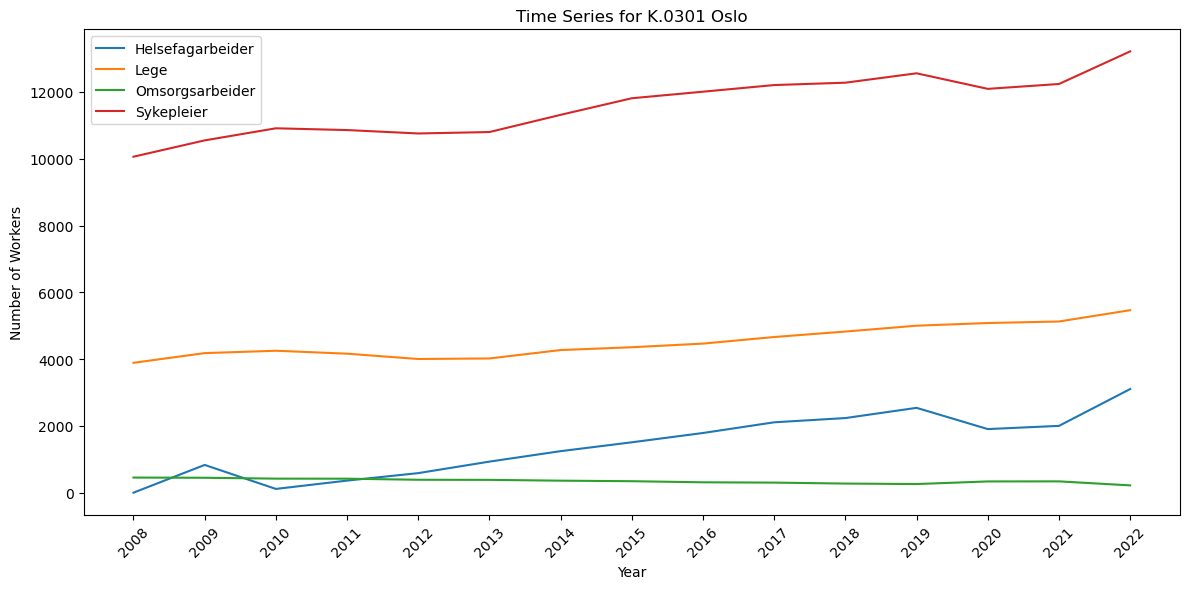

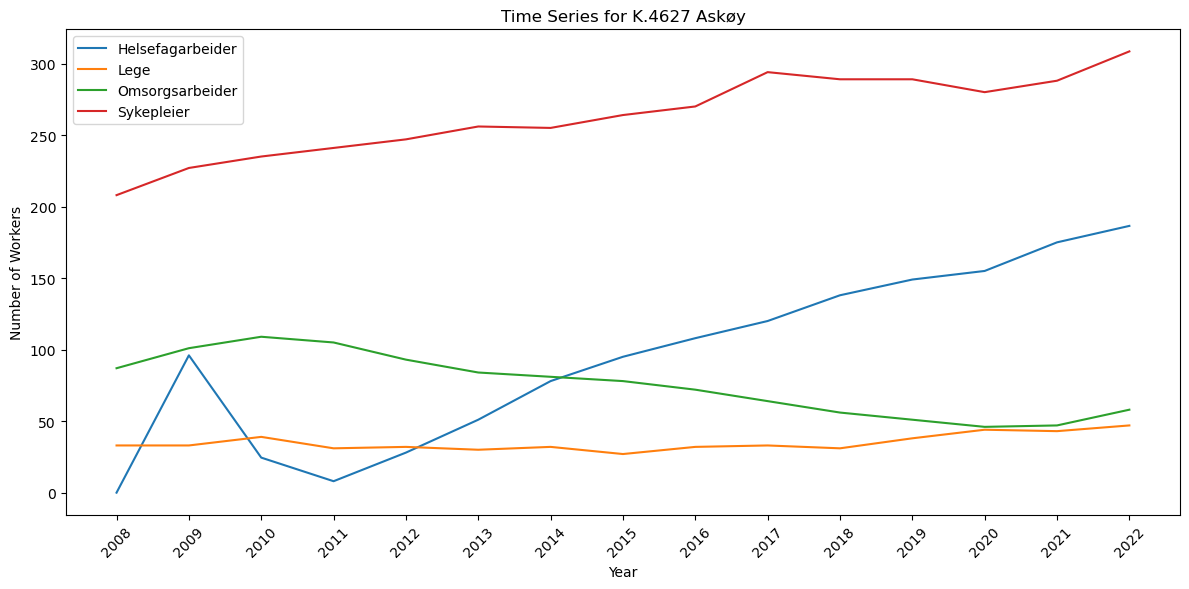

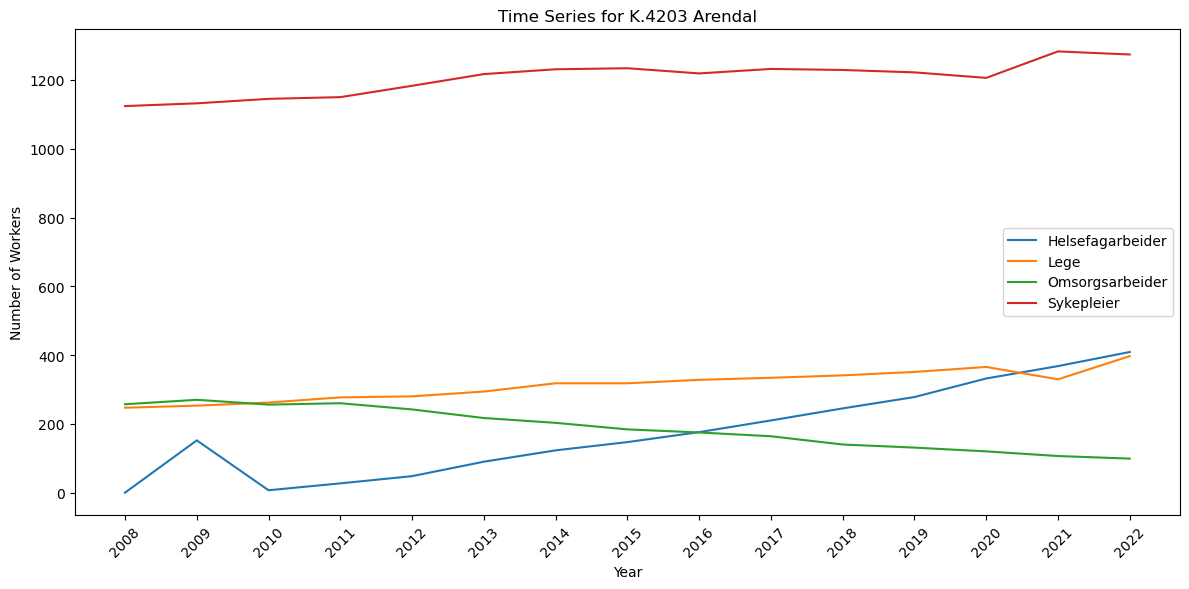

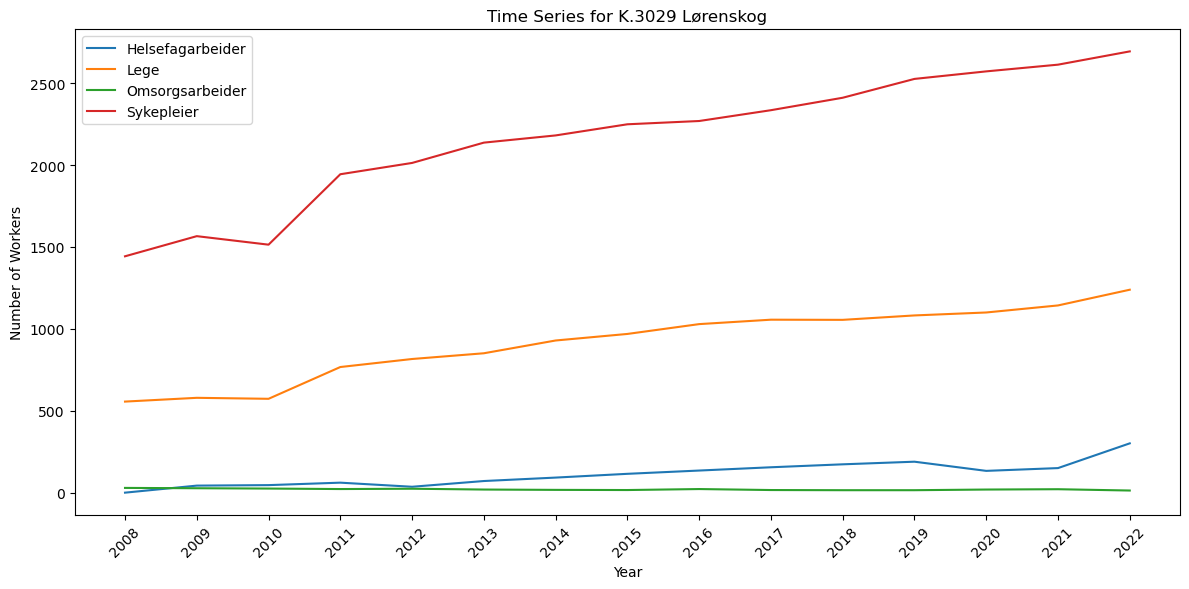

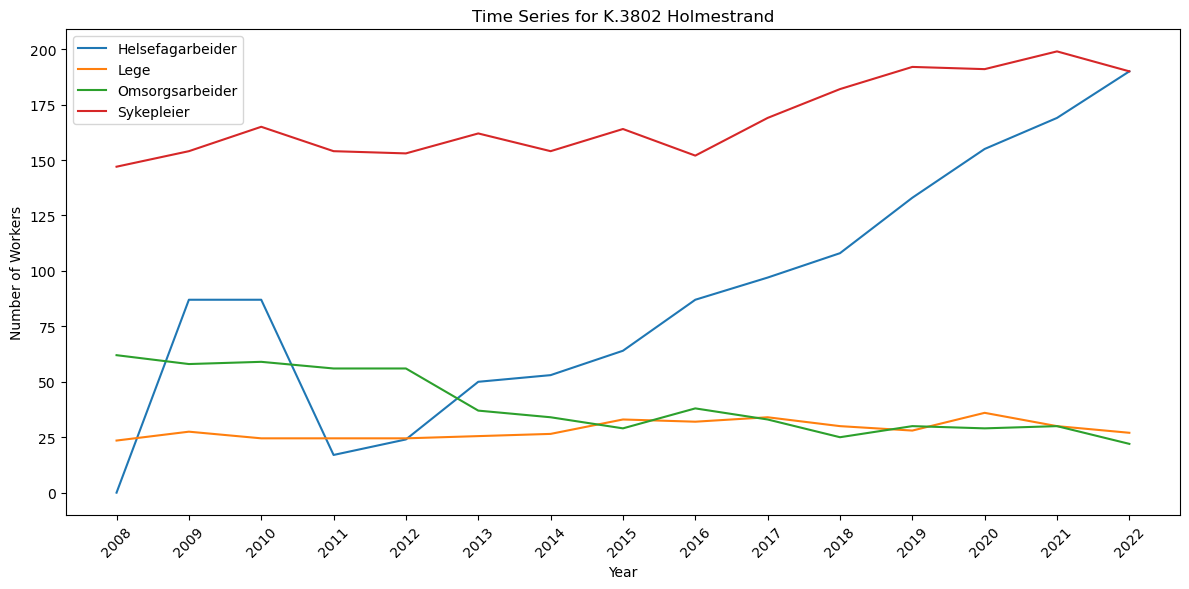

In [166]:
for region in random_regions:
    plt.figure(figsize=(12, 6))
    region_data = plot_data[plot_data['region'] == region]
    for fagutdanning in region_data['fagutdanning'].unique():
        subset = region_data[region_data['fagutdanning'] == fagutdanning]
        plt.plot(subset['Year'], subset['Value'], label=fagutdanning)
    
    plt.title(f'Time Series for {region}')
    plt.xlabel('Year')
    plt.ylabel('Number of Workers')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [167]:
aggregated_data = data.groupby(['region', 'fagutdanning']).sum().reset_index()

# Assuming that '2020' and '2019' are columns in your aggregated_data DataFrame
# Calculate the difference between the years 2020 and 2019 for each 'region'
aggregated_data['Difference_2020_2019'] = aggregated_data['2020'] - aggregated_data['2019']

# Calculate the percentage change
aggregated_data['Percentage_Change'] = (aggregated_data['Difference_2020_2019'] / aggregated_data['2019']) * 100

# Find 'region's with a significant drop and sort them
significant_drop_kommunes = aggregated_data[aggregated_data['Difference_2020_2019'] < 0]
significant_drop_kommunes = significant_drop_kommunes.sort_values('Percentage_Change')

# Display the 'region's with the most significant drops in percentage
significant_drop_kommunes[['region', 'Percentage_Change']]

,region,Percentage_Change
148,K.3405 Lillehammer,-30.000000
110,K.3029 Lørenskog,-29.629630
27,K.1149 Karmøy,-25.531915
0,K.0301 Oslo,-25.039370
92,K.3014 Indre Østfold,-24.242424
...,...,...
179,K.3804 Sandefjord,-0.662252
169,K.3802 Holmestrand,-0.520833
19,K.1108 Sandnes,-0.429799
209,K.4204 Kristiansand,-0.065217


In [168]:
# Find regions with a significant drop (less than -7%)
regions_to_drop = significant_drop_kommunes[significant_drop_kommunes['Percentage_Change'] <= -7.5]['region'].unique()




# Dropping these regions from 'summary_data'
summary_data_dropped = summary_data[~summary_data['region'].isin(regions_to_drop)]


print("Regions before drop:", summary_data['region'].nunique())
print("Regions after drop:", summary_data_dropped['region'].nunique())


Regions before drop: 52
Regions after drop: 14


In [169]:
unique_regions_left = summary_data_dropped['region'].unique()
print(unique_regions_left)


['K.1506 Molde' 'K.1833 Rana' 'K.1875 Hamarøy' 'K.3002 Moss'
 'K.3003 Sarpsborg' 'K.3004 Fredrikstad' 'K.3030 Lillestrøm'
 'K.3033 Ullensaker' 'K.3407 Gjøvik' 'K.3803 Tønsberg' 'K.3806 Porsgrunn'
 'K.3807 Skien' 'K.4204 Kristiansand' 'K.5001 Trondheim - Tråante']


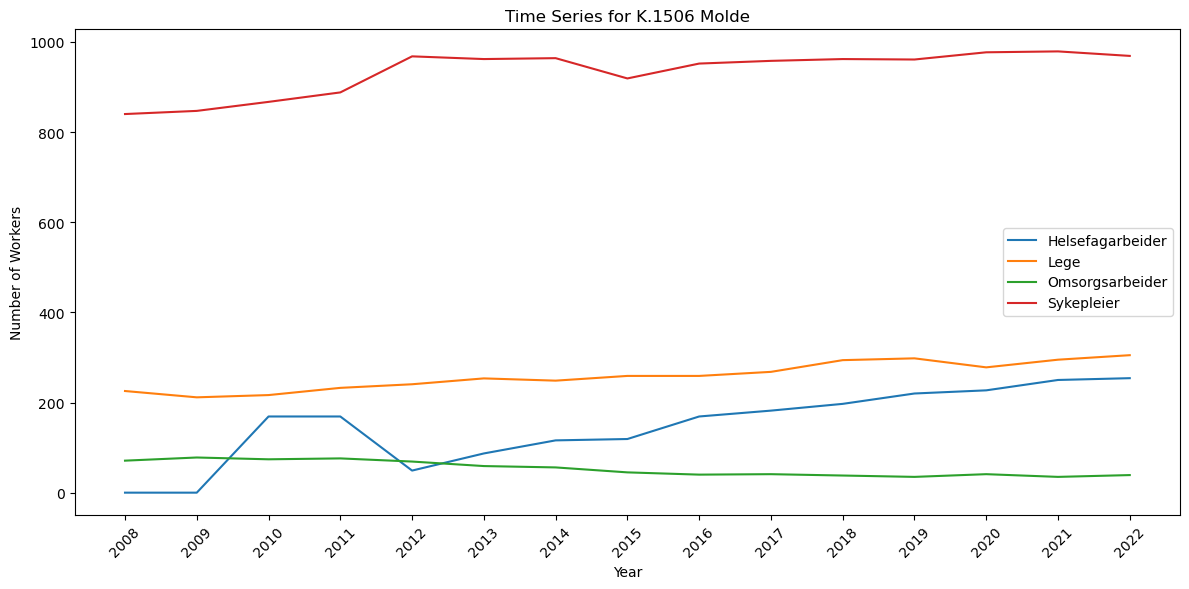

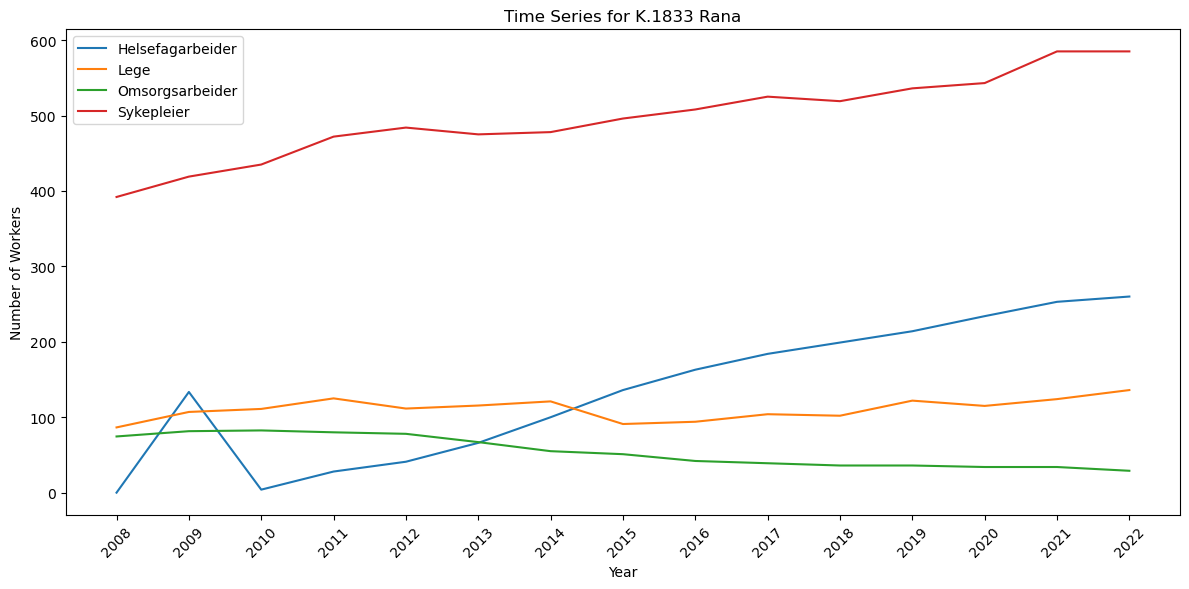

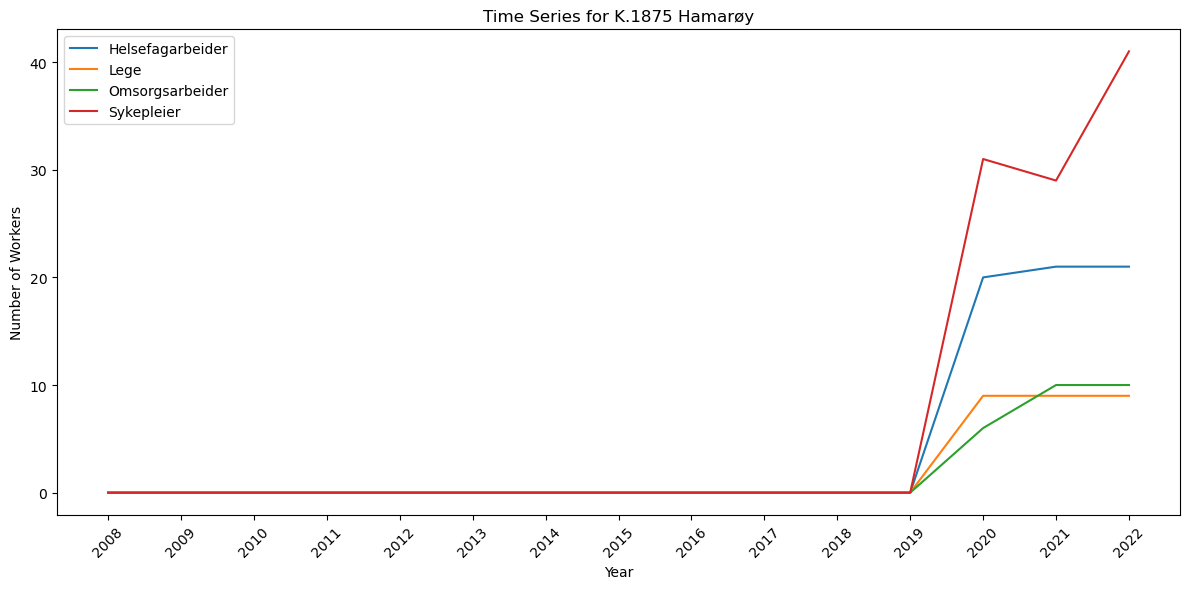

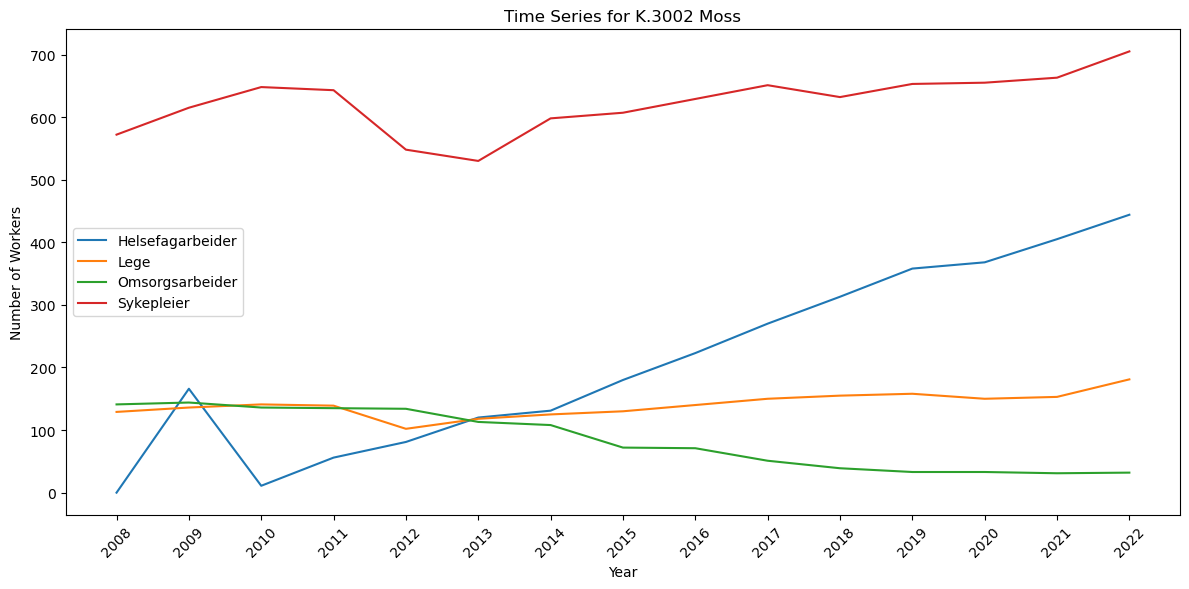

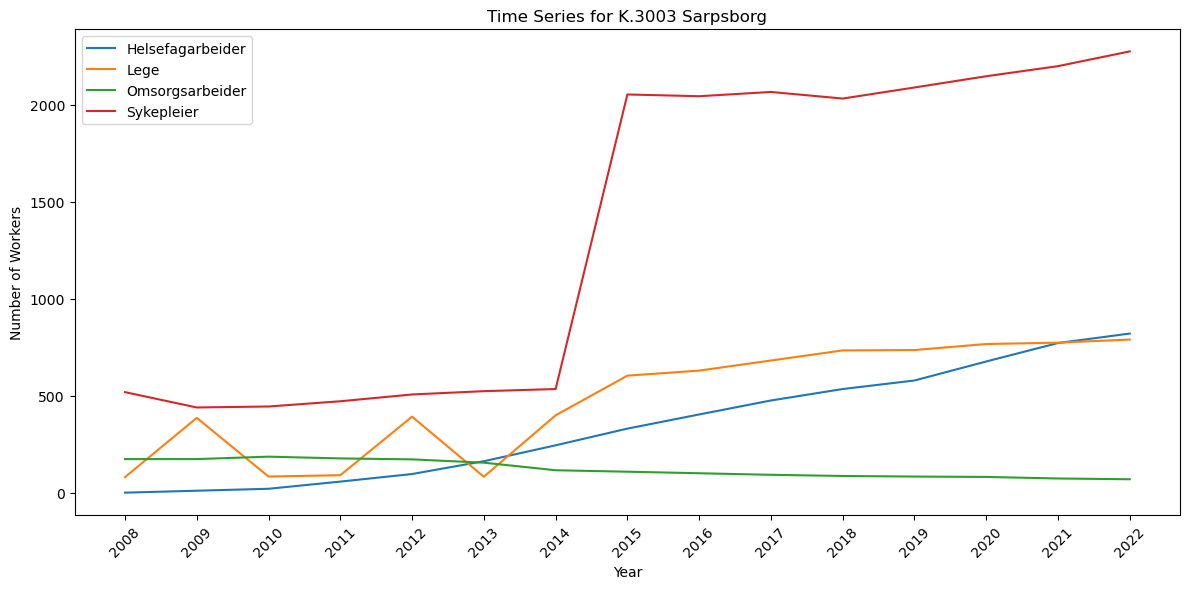

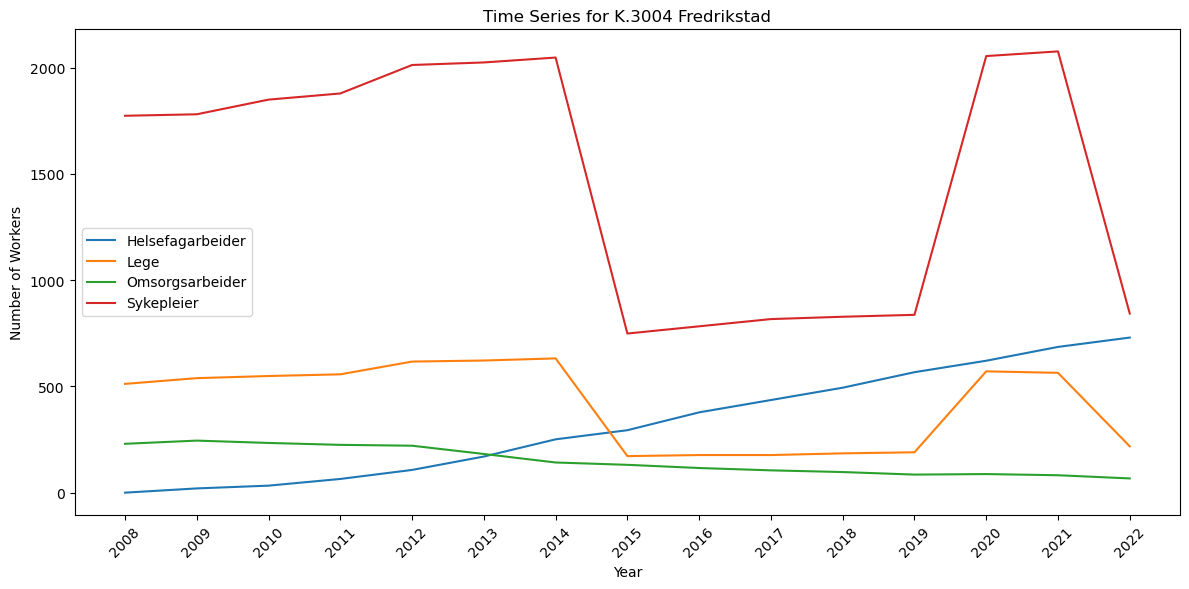

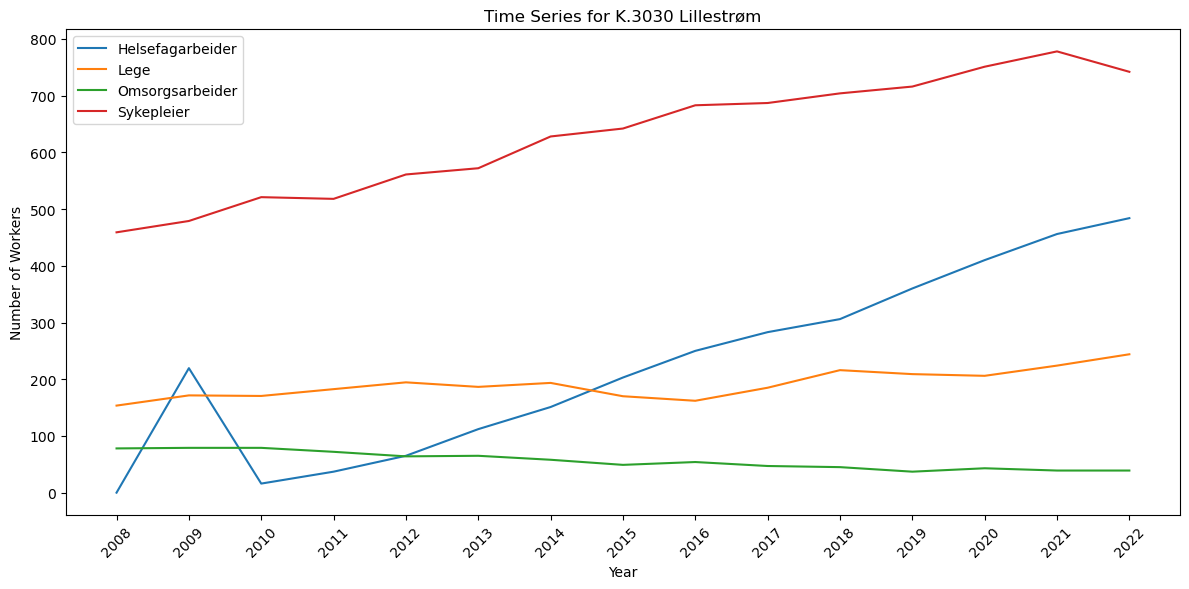

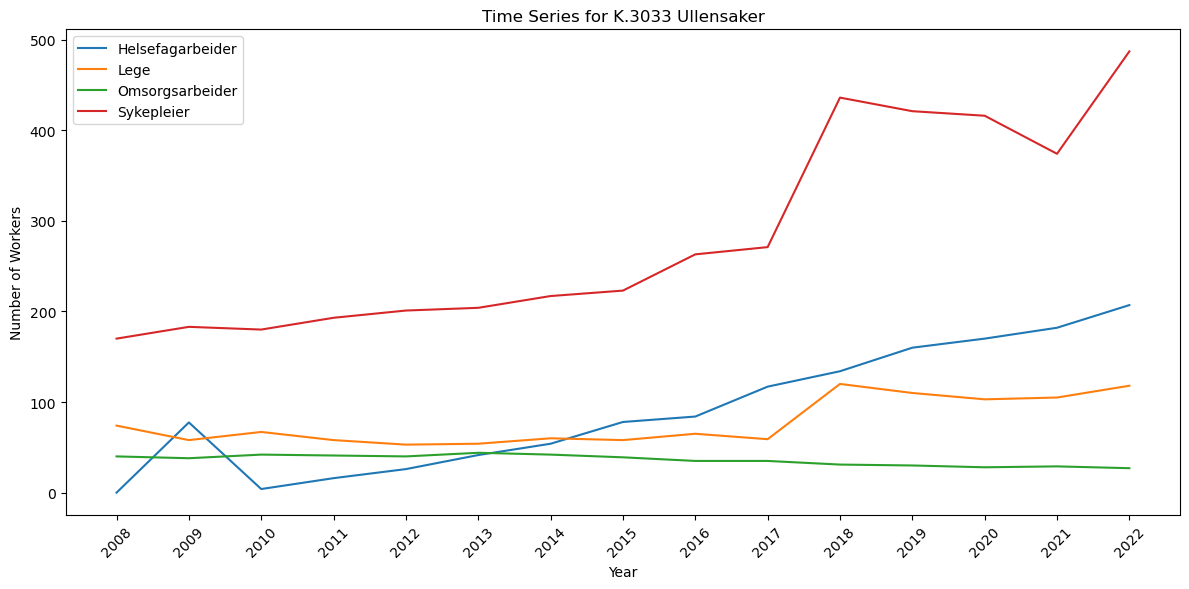

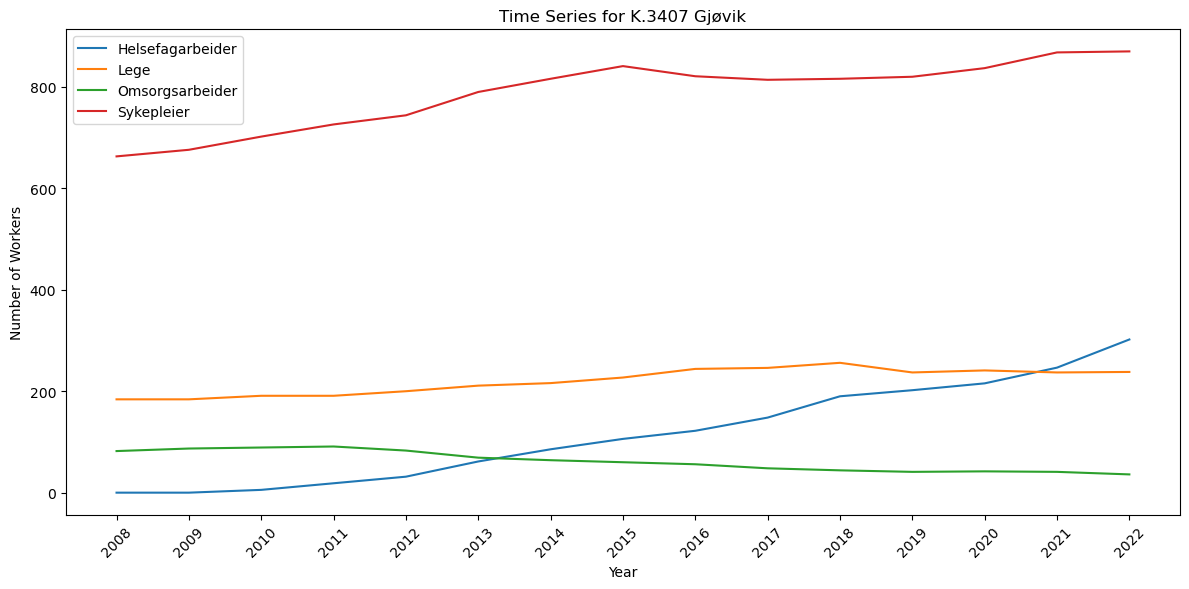

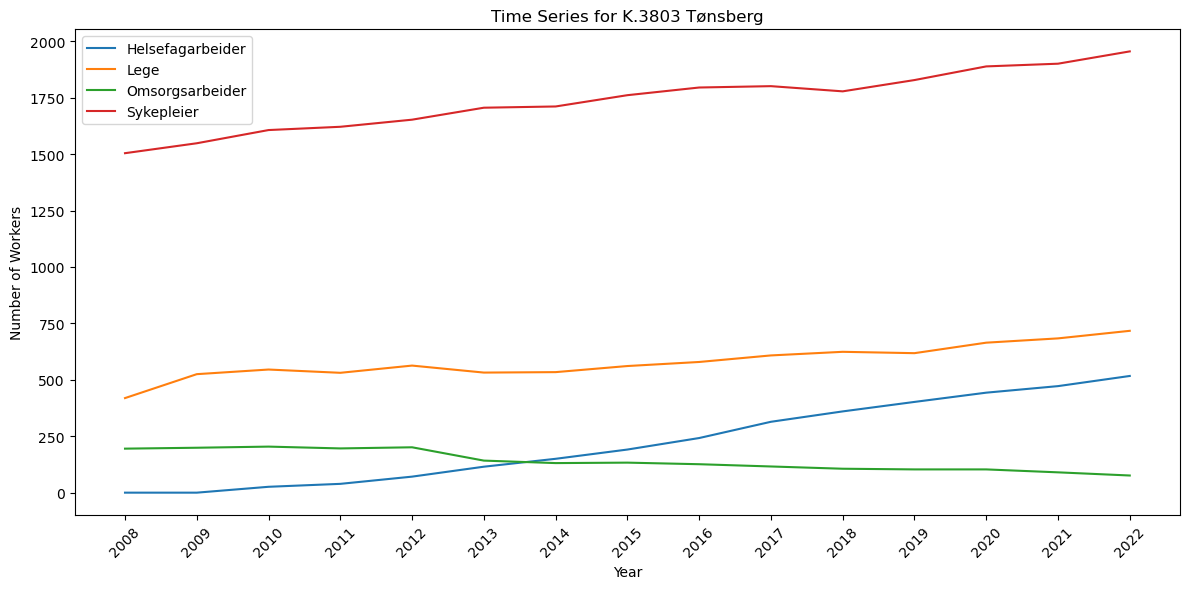

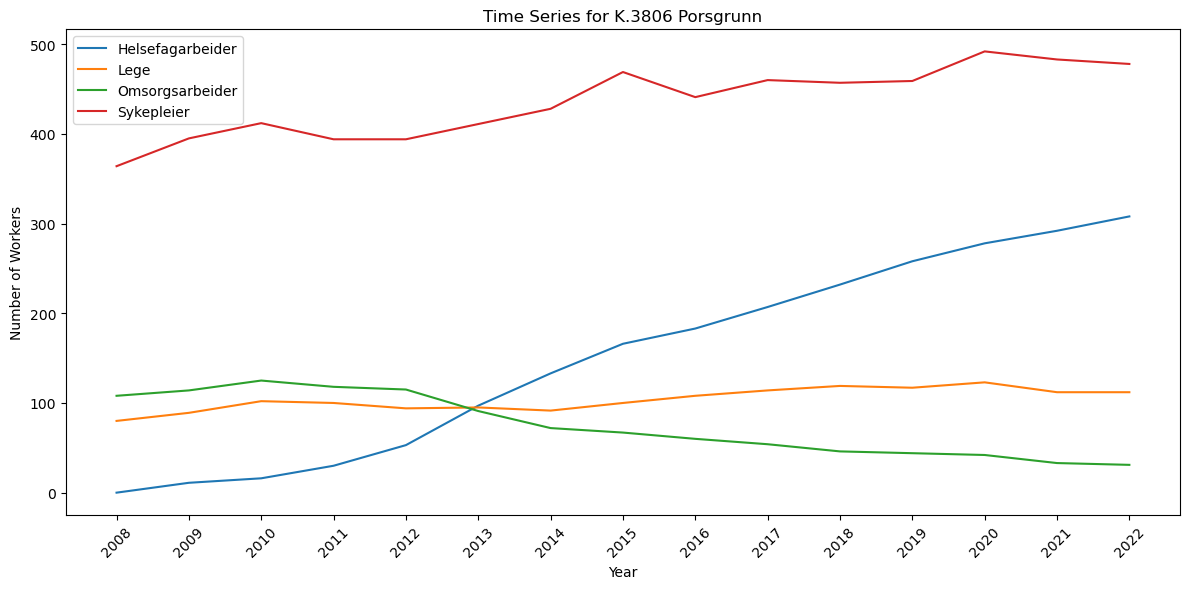

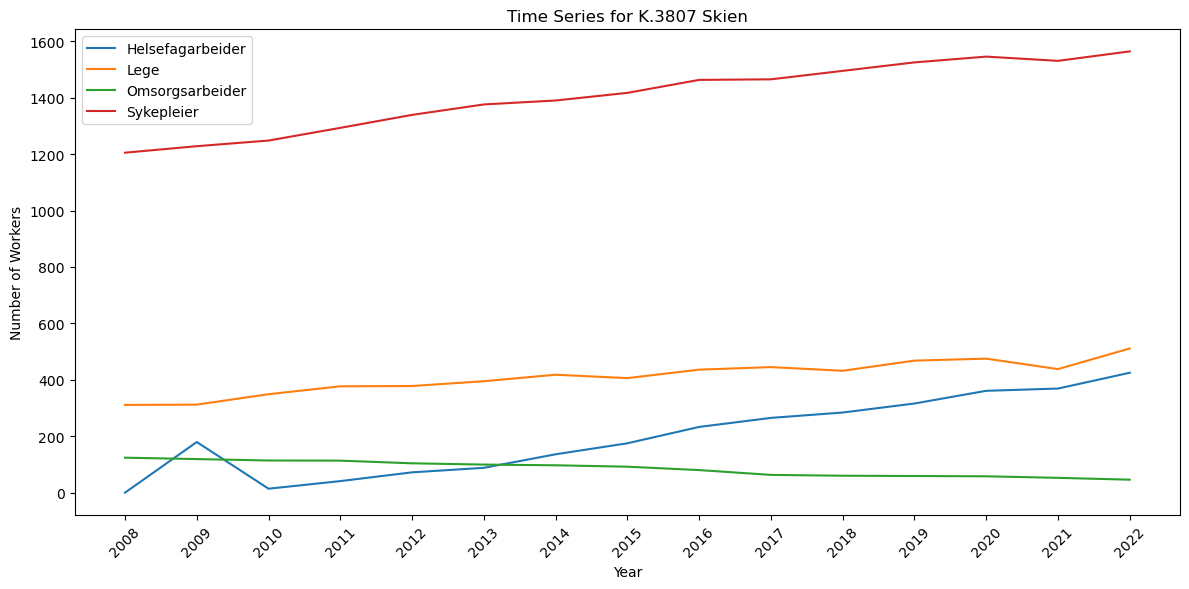

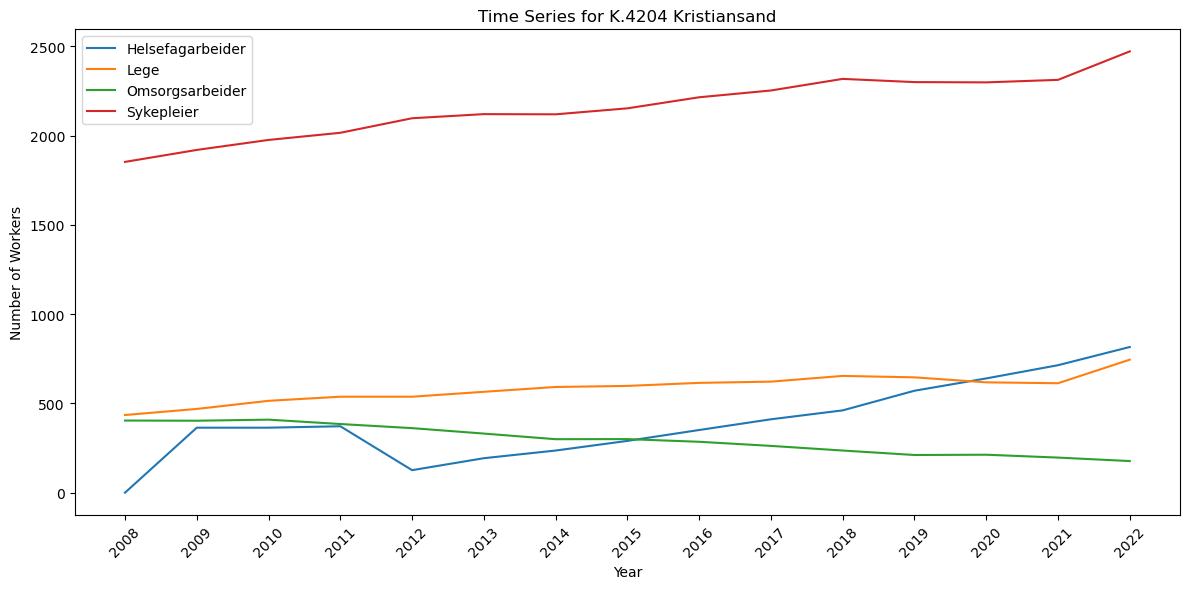

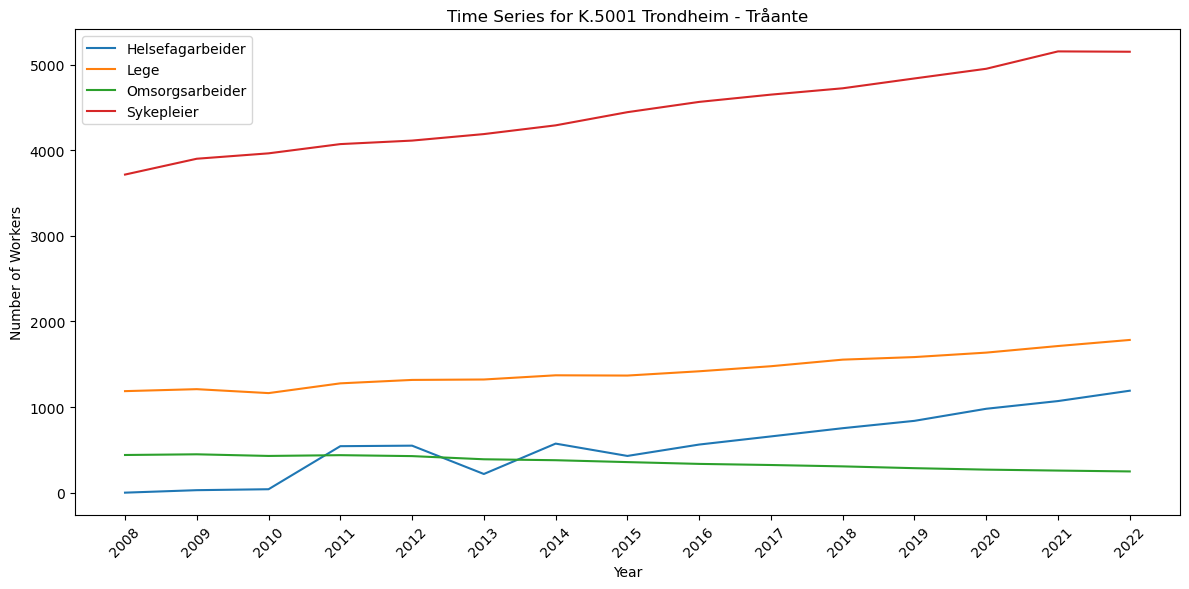

In [170]:
reshaped_data = summary_data_dropped.melt(id_vars=['region', 'fagutdanning'], var_name='Year', value_name='Value')
for region in unique_regions_left:
    plt.figure(figsize=(12, 6))
    region_subset = reshaped_data[reshaped_data['region'] == region]
    for fagutdanning in region_subset['fagutdanning'].unique():
        subset = region_subset[region_subset['fagutdanning'] == fagutdanning]
        plt.plot(subset['Year'], subset['Value'], label=fagutdanning)

    plt.title(f'Time Series for {region}')
    plt.xlabel('Year')
    plt.ylabel('Number of Workers')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [171]:
regions_to_keep = [
    'K.0301 Oslo', 'K.1103 Stavanger', 'K.1106 Haugesund', 'K.1506 Molde',
    'K.1833 Rana', 'K.3002 Moss', 'K.3005 Drammen', 'K.3007 Ringerike',
    'K.3029 Lørenskog', 'K.3030 Lillestrøm', 'K.3033 Ullensaker', 'K.3407 Gjøvik',
    'K.3802 Holmestrand', 'K.3803 Tønsberg', 'K.3806 Porsgrunn', 'K.3807 Skien',
    'K.4204 Kristiansand', 'K.4601 Bergen', 'K.5001 Trondheim - Tråante', 'K.5401 Tromsø'
]

# Filter the DataFrame
summary_data_filtered = summary_data[summary_data['region'].isin(regions_to_keep)]

# Display the filtered DataFrame
print(summary_data_filtered.head())

# Filter the DataFrame
summary_data_filtered = summary_data[summary_data['region'].isin(regions_to_keep)]

# Display the filtered DataFrame
print(summary_data_filtered.head())


             region      fagutdanning     2008     2009     2010     2011  \
0       K.0301 Oslo  Helsefagarbeider      0.0    830.5    112.0    361.0   
1       K.0301 Oslo              Lege   3889.0   4179.0   4250.0   4162.0   
2       K.0301 Oslo   Omsorgsarbeider    452.0    446.0    420.0    418.0   
3       K.0301 Oslo        Sykepleier  10061.0  10550.0  10912.0  10859.0   
4  K.1103 Stavanger  Helsefagarbeider      0.0    589.0    595.0    531.0   

      2012     2013     2014     2015     2016     2017     2018     2019  \
0    585.0    930.0   1243.0   1508.0   1787.0   2107.0   2234.0   2540.0   
1   4003.0   4019.0   4271.0   4355.0   4464.0   4661.0   4825.0   5000.0   
2    386.0    383.0    359.0    343.0    310.0    301.0    272.0    258.0   
3  10757.0  10800.0  11315.0  11812.0  12008.0  12207.0  12278.0  12559.0   
4    550.0    294.0    444.0    562.0    673.0    746.0    808.0    881.0   

      2020     2021     2022  
0   1904.0   2000.0   3103.0  
1   5080.0  

In [172]:


# Print unique regions and professions after filtering
print("\nUnique regions:", summary_data_filtered['region'].unique())
print("Unique fagutdanning:", summary_data_filtered['fagutdanning'].unique())



print("Original DataFrame columns:", summary_data_filtered.columns)

# Check if year columns are correctly named (2008 to 2022)
year_columns = [str(year) for year in range(2008, 2023)]
print("Year columns to be melted:", year_columns)

# Perform the melting process
melted_data_filtered_corrected = summary_data_filtered.melt(id_vars=['region', 'fagutdanning'], 
                                                            value_vars=year_columns,
                                                            var_name='Year', 
                                                            value_name='Workforce')

# Convert 'Year' column to the correct data type if needed
melted_data_filtered_corrected['Year'] = pd.to_numeric(melted_data_filtered_corrected['Year'])




Unique regions: ['K.0301 Oslo' 'K.1103 Stavanger' 'K.1106 Haugesund' 'K.1506 Molde'
 'K.1833 Rana' 'K.3002 Moss' 'K.3005 Drammen' 'K.3007 Ringerike'
 'K.3029 Lørenskog' 'K.3030 Lillestrøm' 'K.3033 Ullensaker'
 'K.3407 Gjøvik' 'K.3802 Holmestrand' 'K.3803 Tønsberg' 'K.3806 Porsgrunn'
 'K.3807 Skien' 'K.4204 Kristiansand' 'K.4601 Bergen'
 'K.5001 Trondheim - Tråante' 'K.5401 Tromsø']
Unique fagutdanning: ['Helsefagarbeider' 'Lege' 'Omsorgsarbeider' 'Sykepleier']
Original DataFrame columns: Index(['region', 'fagutdanning', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')
Year columns to be melted: ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


In [173]:
# Check the first few rows of the melted DataFrame
print(melted_data_filtered_corrected.head())
# Filter for Oslo data for the 'Lege' profession
oslo_data_filtered_corrected = melted_data_filtered_corrected[(melted_data_filtered_corrected['region'] == 'K.0301 Oslo') & (melted_data_filtered_corrected['fagutdanning'] == 'Lege')]

# Display the unique regions, professions, reshaped data, and filtered Oslo data
print("\nUnique regions in filtered data:", summary_data_filtered['region'].unique())
print("Unique fagutdanning in filtered data:", summary_data_filtered['fagutdanning'].unique())
print("\nReshaped Data:")
print(melted_data_filtered_corrected.head())
print("\nFiltered Oslo Data:")
print(oslo_data_filtered_corrected.head())

             region      fagutdanning  Year  Workforce
0       K.0301 Oslo  Helsefagarbeider  2008        0.0
1       K.0301 Oslo              Lege  2008     3889.0
2       K.0301 Oslo   Omsorgsarbeider  2008      452.0
3       K.0301 Oslo        Sykepleier  2008    10061.0
4  K.1103 Stavanger  Helsefagarbeider  2008        0.0

Unique regions in filtered data: ['K.0301 Oslo' 'K.1103 Stavanger' 'K.1106 Haugesund' 'K.1506 Molde'
 'K.1833 Rana' 'K.3002 Moss' 'K.3005 Drammen' 'K.3007 Ringerike'
 'K.3029 Lørenskog' 'K.3030 Lillestrøm' 'K.3033 Ullensaker'
 'K.3407 Gjøvik' 'K.3802 Holmestrand' 'K.3803 Tønsberg' 'K.3806 Porsgrunn'
 'K.3807 Skien' 'K.4204 Kristiansand' 'K.4601 Bergen'
 'K.5001 Trondheim - Tråante' 'K.5401 Tromsø']
Unique fagutdanning in filtered data: ['Helsefagarbeider' 'Lege' 'Omsorgsarbeider' 'Sykepleier']

Reshaped Data:
             region      fagutdanning  Year  Workforce
0       K.0301 Oslo  Helsefagarbeider  2008        0.0
1       K.0301 Oslo              Lege  2008 

In [174]:
oslo_data = melted_data[(melted_data['region'] == 'K.0301 Oslo') & (melted_data['fagutdanning'] == 'Lege')]
print("\nFiltered Oslo Data:")
print(oslo_data.head())



Filtered Oslo Data:
          region fagutdanning  Year   Value
1    K.0301 Oslo         Lege  2008  3889.0
209  K.0301 Oslo         Lege  2009  4179.0
417  K.0301 Oslo         Lege  2010  4250.0
625  K.0301 Oslo         Lege  2011  4162.0
833  K.0301 Oslo         Lege  2012  4003.0


In [175]:
print(oslo_data.columns)

Index(['region', 'fagutdanning', 'Year', 'Value'], dtype='object')


In [176]:
oslo_data['Year'] = pd.to_datetime(oslo_data['Year'], format='%Y')
oslo_data.set_index('Year', inplace=True)


/var/folders/dg/64b0p1yx17dgtv62qtpnxhm00000gn/T/ipykernel_82420/828937575.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oslo_data['Year'] = pd.to_datetime(oslo_data['Year'], format='%Y')


In [177]:
train = oslo_data['Value']['2008':'2020']
test = oslo_data['Value']['2021':'2022']

In [178]:
print("Train Data Size:", len(train))
print("Test Data Size:", len(test))
print("Train Data Head:\n", train.head())
print("Test Data Head:\n", test.head())

Train Data Size: 13
Test Data Size: 2
Train Data Head:
 Year
2008-01-01    3889.0
2009-01-01    4179.0
2010-01-01    4250.0
2011-01-01    4162.0
2012-01-01    4003.0
Name: Value, dtype: float64
Test Data Head:
 Year
2021-01-01    5126.0
2022-01-01    5465.0
Name: Value, dtype: float64


In [179]:
predictions = []

# Rolling forecasting for the training period
for end in range(3, len(train)):
    train_window = train[:end]
    model = ARIMA(train_window, order=(1, 0, 0))  # Adjust the order as needed
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=1)
    predictions.append(forecast[0])

/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information

In [180]:
final_model = ARIMA(train, order=(1, 0, 0))  # Adjust the order as needed
final_model_fit = final_model.fit()

# Forecast for 2021 and 2022
forecast_test = final_model_fit.forecast(steps=2)  # Forecasting for 2 years

# Append test predictions to the prediction list
predictions.extend(forecast_test)

# Combine actual and forecasted values for evaluation
# Ensure the lengths match by excluding the first 3 values from train
actual = pd.concat([train[3:], test])
forecast_comparison = pd.DataFrame({
    'Actual': actual,
    'Forecast': predictions
})

print(forecast_comparison)

            Actual     Forecast
Year                           
2011-01-01  4162.0  4083.439490
2012-01-01  4003.0  4119.738444
2013-01-01  4019.0  4098.123937
2014-01-01  4271.0  4065.910399
2015-01-01  4355.0  4089.448355
2016-01-01  4464.0  4195.971535
2017-01-01  4661.0  4348.104063
2018-01-01  4825.0  4583.628667
2019-01-01  5000.0  4774.655422
2020-01-01  5080.0  4962.689566
2021-01-01  5126.0  5050.206584
2022-01-01  5465.0  5021.852131


/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [181]:
mae = mean_absolute_error(forecast_comparison['Actual'], forecast_comparison['Forecast'])
mse = mean_squared_error(forecast_comparison['Actual'], forecast_comparison['Forecast'])
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 202.41301416515714
Mean Squared Error (MSE): 52775.78953679174
Root Mean Squared Error (RMSE): 229.72981856257087


In [182]:

# Prepare the data for linear regression
train_years = np.arange(2008, 2021).reshape(-1, 1)  # Reshaping for sklearn compatibility
test_years = np.array([2021, 2022]).reshape(-1, 1)

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(train_years, train)

# Predict on the training data
train_predictions = linear_model.predict(train_years)

# Predict on the test data
test_predictions = linear_model.predict(test_years)

# Combine actual and predicted values for evaluation
train_comparison = pd.DataFrame({'Actual': train, 'Predicted': train_predictions}, index=train.index)
test_comparison = pd.DataFrame({'Actual': test, 'Predicted': test_predictions}, index=test.index)

# Displaying the comparison
train_comparison, test_comparison

(            Actual    Predicted
 Year                           
 2008-01-01  3889.0  3859.208791
 2009-01-01  4179.0  3948.802198
 2010-01-01  4250.0  4038.395604
 2011-01-01  4162.0  4127.989011
 2012-01-01  4003.0  4217.582418
 2013-01-01  4019.0  4307.175824
 2014-01-01  4271.0  4396.769231
 2015-01-01  4355.0  4486.362637
 2016-01-01  4464.0  4575.956044
 2017-01-01  4661.0  4665.549451
 2018-01-01  4825.0  4755.142857
 2019-01-01  5000.0  4844.736264
 2020-01-01  5080.0  4934.329670,
             Actual    Predicted
 Year                           
 2021-01-01  5126.0  5023.923077
 2022-01-01  5465.0  5113.516484)

In [183]:
full_actual = pd.concat([train_comparison['Actual'], test_comparison['Actual']])
full_predicted = pd.concat([train_comparison['Predicted'], test_comparison['Predicted']])

# Calculate MAE, MSE, RMSE
mae = mean_absolute_error(full_actual, full_predicted)
mse = mean_squared_error(full_actual, full_predicted)
rmse = np.sqrt(mse)

mae, mse, rmse

(147.09010989011537, 30579.905357647818, 174.87111070056088)

In [184]:
# Print column names to verify
print(summary_data_filtered)


                         region      fagutdanning     2008     2009     2010  \
0                   K.0301 Oslo  Helsefagarbeider      0.0    830.5    112.0   
1                   K.0301 Oslo              Lege   3889.0   4179.0   4250.0   
2                   K.0301 Oslo   Omsorgsarbeider    452.0    446.0    420.0   
3                   K.0301 Oslo        Sykepleier  10061.0  10550.0  10912.0   
4              K.1103 Stavanger  Helsefagarbeider      0.0    589.0    595.0   
..                          ...               ...      ...      ...      ...   
191  K.5001 Trondheim - Tråante        Sykepleier   3716.0   3901.0   3964.0   
200               K.5401 Tromsø  Helsefagarbeider      0.0    196.5     44.0   
201               K.5401 Tromsø              Lege    663.0    721.0    753.0   
202               K.5401 Tromsø   Omsorgsarbeider    147.0    147.0    141.0   
203               K.5401 Tromsø        Sykepleier   1666.0   1699.0   1773.0   

        2011     2012     2013     2014

In [185]:
missing_year_rows = encoded_df[encoded_df['Year'].isna()]
missing_year_rows.head()

NameError: name 'encoded_df' is not defined

In [186]:
# Clean the df_lege DataFrame by dropping NaN values and reset the index
df_lege_cleaned = df_lege.dropna().reset_index(drop=True)

# One-Hot Encode the 'region' column of the cleaned DataFrame
encoder = OneHotEncoder()
encoded_regions = encoder.fit_transform(df_lege_cleaned[['region']]).toarray()

# Creating column names for the encoded regions
region_categories = encoder.categories_[0]
encoded_column_names = ['region_' + str(category) for category in region_categories]
encoded_df_cleaned = pd.DataFrame(encoded_regions, columns=encoded_column_names)

# Aligning the 'Year' column in the encoded DataFrame with the cleaned DataFrame
encoded_df_cleaned['Year'] = df_lege_cleaned['Year']

# Re-define the target variable after dropping NaNs
target_cleaned = df_lege_cleaned['Workforce']

# Train the Linear Regression Model with the cleaned data
linear_model = LinearRegression()
linear_model.fit(encoded_df_cleaned, target_cleaned)


NameError: name 'df_lege' is not defined

In [187]:
# Assuming 'region_categories' holds all unique regions
years_to_predict = np.arange(2011, 2023)
regions_to_predict = region_categories  # All unique regions

# Creating a DataFrame for prediction
prediction_df = pd.DataFrame([(year, region) for year in years_to_predict for region in regions_to_predict], columns=['Year', 'region'])

NameError: name 'region_categories' is not defined

In [188]:
# Ensure that the 'region' column in prediction_df is properly set up
# Example: prediction_df should have columns 'region' and 'Year'

# One-Hot Encode the 'region' column for the prediction DataFrame
encoded_regions_predict = encoder.transform(prediction_df[['region']]).toarray()
encoded_df_predict = pd.DataFrame(encoded_regions_predict, columns=encoded_column_names)
encoded_df_predict['Year'] = prediction_df['Year']

# Predict using the linear model
predicted_values = linear_model.predict(encoded_df_predict)

# Adding predictions to the DataFrame
prediction_df['Predicted_Value'] = predicted_values

# Display the DataFrame with predictions
print(prediction_df)



NameError: name 'encoder' is not defined

In [189]:
# Filter for Lege in summary_data_filtered
actual_data_lege = summary_data_filtered[summary_data_filtered['fagutdanning'] == 'Lege']

# Reshape the data if necessary
actual_data_lege_melted = actual_data_lege.melt(id_vars=['region'], value_vars=[str(year) for year in range(2008, 2023)],
                                                var_name='Year', value_name='Actual_Value')

# Convert 'Year' to the same format as in prediction_df if necessary
actual_data_lege_melted['Year'] = pd.to_datetime(actual_data_lege_melted['Year'], format='%Y').dt.year

# Merge predicted and actual data
merged_data = pd.merge(prediction_df, actual_data_lege_melted, on=['region', 'Year'], how='inner')


mae = mean_absolute_error(merged_data['Actual_Value'], merged_data['Predicted_Value'])
mse = mean_squared_error(merged_data['Actual_Value'], merged_data['Predicted_Value'])
rmse = mean_squared_error(merged_data['Actual_Value'], merged_data['Predicted_Value'], squared=False)

# Print the evaluation metrics
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")


NameError: name 'prediction_df' is not defined

In [190]:


# Filter the actual data from summary_data_filtered for 'Lege' profession
yearly_average = merged_data.groupby('Year').mean()[['Actual_Value', 'Predicted_Value']]

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(yearly_average.index, yearly_average['Actual_Value'], color='blue', label='Actual Average')
plt.plot(yearly_average.index, yearly_average['Predicted_Value'], color='red', label='Predicted Average')
plt.title('Average Actual vs Predicted Workforce for Lege Profession per Year')
plt.xlabel('Year')
plt.ylabel('Average Workforce')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

NameError: name 'merged_data' is not defined

In [191]:
# Convert 'Year' column to datetime format in the merged data
merged_data['Year'] = pd.to_datetime(merged_data['Year'], format='%Y')

# Filtering for Oslo data
oslo_merged_data = merged_data[merged_data['region'] == 'K.0301 Oslo']

# Extracting actual and predicted values for 2021 and 2022
oslo_comparison = oslo_merged_data[['Year', 'Actual_Value', 'Predicted_Value']]

# Displaying the comparison
print(oslo_comparison[['Year', 'Actual_Value', 'Predicted_Value']])



NameError: name 'merged_data' is not defined

In [192]:
# Assuming 'melted_data' is your DataFrame
print("Columns in the DataFrame:", melted_data_filtered_corrected.columns)


Columns in the DataFrame: Index(['region', 'fagutdanning', 'Year', 'Workforce'], dtype='object')


In [193]:


 models = {}
evaluation_metrics = {}

# Check if 'Workforce' column exists
if 'Workforce' in melted_data_filtered_corrected.columns:
    for region in melted_data_filtered_corrected['region'].unique():
        for fagutdanning in melted_data_filtered_corrected['fagutdanning'].unique():
            # Filter data for specific region and fagutdanning
            subset = melted_data_filtered_corrected[(melted_data_filtered_corrected['region'] == region) & 
                                                    (melted_data_filtered_corrected['fagutdanning'] == fagutdanning)]

            # Check if there's enough data to train a model
            if len(subset) > 12:  # Minimum threshold for data points
                # Prepare training data
                X = subset['Year'].values.reshape(-1, 1)  # Reshape Year for sklearn
                y = subset['Workforce']

                # Split data into training and testing sets
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                # Train a linear regression model
                model = LinearRegression()
                model.fit(X_train, y_train)

                # Evaluate the model
                predictions = model.predict(X_test)
                mse = mean_squared_error(y_test, predictions)
                r2 = r2_score(y_test, predictions)

                # Store the model and its evaluation
                models[(region, fagutdanning)] = model
                evaluation_metrics[(region, fagutdanning)] = {'MSE': mse, 'R2': r2}

                print(f"Model created for {region}, {fagutdanning}")  # Confirm model creatio




Model created for K.0301 Oslo, Helsefagarbeider
Model created for K.0301 Oslo, Lege
Model created for K.0301 Oslo, Omsorgsarbeider
Model created for K.0301 Oslo, Sykepleier
Model created for K.1103 Stavanger, Helsefagarbeider
Model created for K.1103 Stavanger, Lege
Model created for K.1103 Stavanger, Omsorgsarbeider
Model created for K.1103 Stavanger, Sykepleier
Model created for K.1106 Haugesund, Helsefagarbeider
Model created for K.1106 Haugesund, Lege
Model created for K.1106 Haugesund, Omsorgsarbeider
Model created for K.1106 Haugesund, Sykepleier
Model created for K.1506 Molde, Helsefagarbeider
Model created for K.1506 Molde, Lege
Model created for K.1506 Molde, Omsorgsarbeider
Model created for K.1506 Molde, Sykepleier
Model created for K.1833 Rana, Helsefagarbeider
Model created for K.1833 Rana, Lege
Model created for K.1833 Rana, Omsorgsarbeider
Model created for K.1833 Rana, Sykepleier
Model created for K.3002 Moss, Helsefagarbeider
Model created for K.3002 Moss, Lege
Model c

In [194]:
models_with_high_r2 = {key: metrics for key, metrics in evaluation_metrics.items() if metrics['R2'] > 0.5}

# Print the models with their R2 scores
models_with_high_r2

count_high_r2_models = len(models_with_high_r2)

print(f"Number of models with R2 score > 0.5: {count_high_r2_models}")


Number of models with R2 score > 0.5: 76


In [195]:


## Initialize an empty DataFrame to store all predictions
all_predictions_df = pd.DataFrame()

# Iterate over all models with high R2 score
for model_key in models_with_high_r2:
    # Extract model and make future predictions
    model = models[model_key]
    future_years = np.arange(2023, 2036).reshape(-1, 1)  # Years from 2023 to 2035
    future_predictions = model.predict(future_years)

    # Create a DataFrame for these predictions
    predictions_df = pd.DataFrame({
        'Region': model_key[0],
        'Fagutdanning': model_key[1],
        'Year': np.arange(2023, 2036),
        'Predicted_Workforce': future_predictions
    })

    # Append to the all_predictions_df
    all_predictions_df = pd.concat([all_predictions_df, predictions_df])

# Save the combined DataFrame to a CSV file
all_predictions_df.to_csv('future_predictions_all_models.csv', index=False)

print("Future predictions CSV file created for all high R2 score models")


Future predictions CSV file created for all high R2 score models


In [196]:
models_with_low_r2 = {key: metrics for key, metrics in evaluation_metrics.items() if metrics['R2'] < 0.5}

# Print the models with their R2 scores
models_with_low_r2

{('K.1833 Rana', 'Lege'): {'MSE': 186.10999023670084,
  'R2': 0.11399634375545742},
 ('K.3033 Ullensaker', 'Lege'): {'MSE': 686.0417529339464,
  'R2': -0.49790775749769955},
 ('K.3033 Ullensaker', 'Omsorgsarbeider'): {'MSE': 9.394365133767147,
  'R2': 0.4363380919739711},
 ('K.3802 Holmestrand', 'Lege'): {'MSE': 9.622451208595846,
  'R2': 0.4798675022380623}}

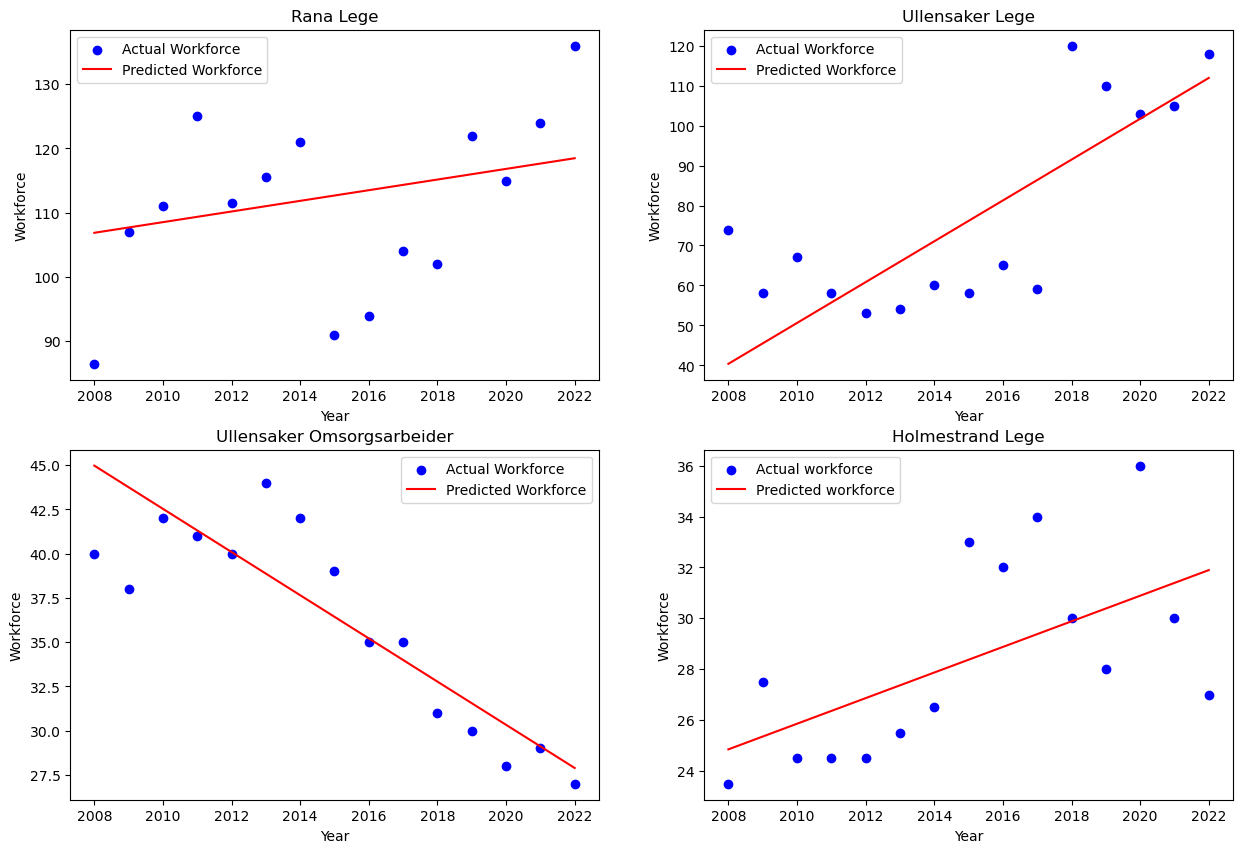

In [197]:
# Preparing data and models for plotting
model_rana_lege = models[('K.1833 Rana', 'Lege')]
rana_lege_data = melted_data_filtered_corrected[
    (melted_data_filtered_corrected['region'] == 'K.1833 Rana') & 
    (melted_data_filtered_corrected['fagutdanning'] == 'Lege')
]
X_rana_lege = rana_lege_data['Year'].values.reshape(-1, 1)
y_rana_lege = rana_lege_data['Workforce']
predictions_rana_lege = model_rana_lege.predict(X_rana_lege)

model_ullensaker_lege = models[('K.3033 Ullensaker', 'Lege')]
ullensaker_lege_data = melted_data_filtered_corrected[
    (melted_data_filtered_corrected['region'] == 'K.3033 Ullensaker') & 
    (melted_data_filtered_corrected['fagutdanning'] == 'Lege')
]
X_ullensaker_lege = ullensaker_lege_data['Year'].values.reshape(-1, 1)
y_ullensaker_lege = ullensaker_lege_data['Workforce']
predictions_ullensaker_lege = model_ullensaker_lege.predict(X_ullensaker_lege)

model_ullensaker_omsorgsarbeider = models[('K.3033 Ullensaker', 'Omsorgsarbeider')]
ullensaker_omsorgsarbeider_data = melted_data_filtered_corrected[
    (melted_data_filtered_corrected['region'] == 'K.3033 Ullensaker') & 
    (melted_data_filtered_corrected['fagutdanning'] == 'Omsorgsarbeider')
]
X_ullensaker_omsorgsarbeider = ullensaker_omsorgsarbeider_data['Year'].values.reshape(-1, 1)
y_ullensaker_omsorgsarbeider = ullensaker_omsorgsarbeider_data['Workforce']
predictions_ullensaker_omsorgsarbeider = model_ullensaker_omsorgsarbeider.predict(X_ullensaker_omsorgsarbeider)

model_holmestrand_lege = models[('K.3802 Holmestrand', 'Lege')]
holmestrand_lege_data = melted_data_filtered_corrected[
    (melted_data_filtered_corrected['region'] == 'K.3802 Holmestrand') & 
    (melted_data_filtered_corrected['fagutdanning'] == 'Lege')
]
X_holmestrand_lege = holmestrand_lege_data['Year'].values.reshape(-1, 1)
y_holmestrand_lege = holmestrand_lege_data['Workforce']
predictions_holmestrand_lege = model_holmestrand_lege.predict(X_holmestrand_lege)

# Plotting
plt.figure(figsize=(15, 10))

# Rana Lege
plt.subplot(2, 2, 1)
plt.scatter(X_rana_lege, y_rana_lege, color='blue', label='Actual Workforce')
plt.plot(X_rana_lege, predictions_rana_lege, color='red', label='Predicted Workforce')
plt.title('Rana Lege')
plt.xlabel('Year')
plt.ylabel('Workforce')
plt.legend()

# Ullensaker Lege
plt.subplot(2, 2, 2)
plt.scatter(X_ullensaker_lege, y_ullensaker_lege, color='blue', label='Actual Workforce')
plt.plot(X_ullensaker_lege, predictions_ullensaker_lege, color='red', label='Predicted Workforce')
plt.title('Ullensaker Lege')
plt.xlabel('Year')
plt.ylabel('Workforce')
plt.legend()

# Ullensaker Omsorgsarbeider
plt.subplot(2, 2, 3)
plt.scatter(X_ullensaker_omsorgsarbeider, y_ullensaker_omsorgsarbeider, color='blue', label='Actual Workforce')
plt.plot(X_ullensaker_omsorgsarbeider, predictions_ullensaker_omsorgsarbeider, color='red', label='Predicted Workforce')
plt.title('Ullensaker Omsorgsarbeider') 
plt.xlabel('Year')
plt.ylabel('Workforce')
plt.legend()

plt.subplot(2, 2, 4)
plt.scatter(X_holmestrand_lege, y_holmestrand_lege, color='blue', label='Actual workforce')
plt.plot(X_holmestrand_lege, predictions_holmestrand_lege, color='red', label='Predicted workforce')
plt.title('Holmestrand Lege') 
plt.xlabel('Year')
plt.ylabel('Workforce')
plt.legend()



In [198]:
# Assuming melted_data_filtered_corrected is a Pandas DataFrame with correct data format
data_subset = melted_data_filtered_corrected[
    (melted_data_filtered_corrected['region'] == 'K.3802 Holmestrand') & 
    (melted_data_filtered_corrected['fagutdanning'] == 'Lege')
]

# Preparing input and output data
X = data_subset['Year'].values.reshape(-1, 1)  # No need to convert if already in integer format
y = data_subset['Workforce']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
degree = 2  # Adjust the degree
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
polyreg.fit(X_train, y_train)

# Predict and evaluate the model
predictions = polyreg.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('MSE:', mse)
print('R2 Score:', r2)

# Add the model to the dictionaries
model_key = ('K.3802 Holmestrand', 'Lege')
models[model_key] = polyreg
evaluation_metrics[model_key] = {'MSE': mse, 'R2': r2}

# Years to predict
years_to_predict = list(range(2023, 2036))  # From 2023 to 2035

# Create input data for prediction
X_future = np.array(years_to_predict).reshape(-1, 1)

# Generate future predictions using the polynomial model
future_predictions = polyreg.predict(X_future)

# Append future predictions to the all_predictions list
all_predictions = []
for year, pred in zip(years_to_predict, future_predictions):
    all_predictions.append({'Region': model_key[0], 'Fagutdanning': model_key[1], 'Year': year, 'Predicted_Workforce': pred})

# Convert to DataFrame and save to CSV
predictions_df = pd.DataFrame(all_predictions)
predictions_df.to_csv('future_predictions_all_models.csv', index=False)

print(f"Model and future predictions added for {model_key}")



MSE: 7.411064032449528
R2 Score: 0.5994019441919174
Model and future predictions added for ('K.3802 Holmestrand', 'Lege')


In [199]:
# Add the model to the dictionaries
model_key = ('K.3802 Holmestrand', 'Lege')
models[model_key] = polyreg
evaluation_metrics[model_key] = {'MSE': mse, 'R2': r2}

# Years to predict
years_to_predict = list(range(2023, 2036))  # From 2023 to 2035

# Create input data for prediction
X_future = np.array(years_to_predict).reshape(-1, 1)

# Generate future predictions using the polynomial model
future_predictions = polyreg.predict(X_future)

# Append future predictions to the all_predictions list
for year, pred in zip(years_to_predict, future_predictions):
    all_predictions.append({'Region': model_key[0], 'Fagutdanning': model_key[1], 'Year': year, 'Predicted_Workforce': pred})

# Convert to DataFrame and save to CSV
predictions_df = pd.DataFrame(all_predictions)
predictions_df.to_csv('future_predictions_all_models.csv', index=False)

print(f"Model and future predictions added for {model_key}")


Model and future predictions added for ('K.3802 Holmestrand', 'Lege')


In [200]:

# Example for one region and profession
region = 'K.3033 Ullensaker'
profession = 'Lege'

# Extract data for this region and profession
data_subset = melted_data_filtered_corrected[(melted_data_filtered_corrected['region'] == region) & 
                                             (melted_data_filtered_corrected['fagutdanning'] == profession)]

# Preparing input and output data
X = data_subset['Year'].values.reshape(-1, 1)
y = data_subset['Workforce']

# Create polynomial features

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
degree = 2  # Adjust the degree
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
polyreg.fit(X_train, y_train)

# Predict and evaluate the model
predictions = polyreg.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

mse, r2

(290.71232864352106, 0.3652569243591244)

In [201]:

# Example for one region and profession
region = 'K.3033 Ullensaker'
profession = 'Omsorgsarbeider'

# Extract data for this region and profession
data_subset = melted_data_filtered_corrected[(melted_data_filtered_corrected['region'] == region) & 
                                             (melted_data_filtered_corrected['fagutdanning'] == profession)]

# Preparing input and output data
X = data_subset['Year'].values.reshape(-1, 1)  # No need to convert if already in integer format
y = data_subset['Workforce']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
degree = 2  # Adjust the degree
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
polyreg.fit(X_train, y_train)

# Predict and evaluate the model
predictions = polyreg.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('MSE:', mse)
print('R2 Score:', r2)

MSE: 2.085315531992936
R2 Score: 0.8748810680804239


In [202]:
model_key = ('K.3033 Ullensaker', 'Omsorgsarbeider')
models[model_key] = polyreg
evaluation_metrics[model_key] = {'MSE': mse, 'R2': r2}

# Years to predict
years_to_predict = list(range(2023, 2036))  # From 2023 to 2035

# Create input data for prediction
X_future = np.array(years_to_predict).reshape(-1, 1)

# Generate future predictions using the polynomial model
future_predictions = polyreg.predict(X_future)

# Append future predictions to the all_predictions list
for year, pred in zip(years_to_predict, future_predictions):
    all_predictions.append({'Region': model_key[0], 'Fagutdanning': model_key[1], 'Year': year, 'Predicted_Workforce': pred})

# Convert to DataFrame and save to CSV
predictions_df = pd.DataFrame(all_predictions)
predictions_df.to_csv('future_predictions_all_models.csv', index=False)

print(f"Model and future predictions added for {model_key}")

Model and future predictions added for ('K.3033 Ullensaker', 'Omsorgsarbeider')


In [203]:

# Example for one region and profession
region = 'K.1833 Rana'
profession = 'Lege'

# Extract data for this region and profession
data_subset = melted_data_filtered_corrected[(melted_data_filtered_corrected['region'] == region) & 
                                             (melted_data_filtered_corrected['fagutdanning'] == profession)]

# Preparing input and output data
X = data_subset['Year'].values.reshape(-1, 1)
y = data_subset['Workforce']

# Create polynomial features

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
degree = 2  # Adjust the degree
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model
polyreg.fit(X_train, y_train)

# Predict and evaluate the model
predictions = polyreg.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

mse, r2

(530.9475845090498, -1.5276531396886792)

In [204]:
future_predictions_df = pd.read_csv('future_predictions_all_models.csv')

# Display unique values for 'Region'
unique_regions = future_predictions_df['Region'].unique()

unique_regions

array(['K.3802 Holmestrand', 'K.3033 Ullensaker'], dtype=object)

In [205]:
df = pd.read_csv('/Users/lime/Downloads/MMM.csv', delimiter=';', skiprows=1, header=None, encoding='ISO-8859-1')

# Manually set the column names
df.columns = ['Hovedalternativet (MMMM)', 'Municipality' ,'Age Group', '2022', '2023', '2024', '2025', '2026', '2027', '2028', '2029', '2030', '2031', '2032', '2033', '2034', '2035']

# Display the first few rows of the dataframe
df.head()


,Hovedalternativet (MMMM),Municipality,Age Group,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
0,statistikkvariabel,region,alder,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
1,Hovedalternativet (MMMM),3002 Moss,0-17 år,9798,9789,9818,9762,9730,9708,9625,9595,9568,9568,9570,9582,9575,9612
2,Hovedalternativet (MMMM),3002 Moss,18-49 år,19492,19666,19738,19785,19812,19880,19977,20011,20063,20058,20084,20123,20142,20144
3,Hovedalternativet (MMMM),3002 Moss,50-66 år,11743,11924,12096,12242,12374,12408,12490,12591,12649,12716,12694,12650,12657,12628
4,Hovedalternativet (MMMM),3002 Moss,67-79 år,6768,6866,6936,6974,6981,7002,7020,7051,7152,7221,7439,7636,7838,8038


In [206]:
# Assuming 'df' is your DataFrame with columns ['Hovedalternativet (MMMM)', 'Municipality', 'Age Group', ..., '2035']

# Filter data for the relevant age groups (67 years and older)
elderly_data = df[df['Age Group'].isin(['67-79 år', '80-89 år', '90 år og eldre'])]

# Melt the dataframe to convert year columns into rows
melted_elderly_data = elderly_data.melt(id_vars=['Municipality', 'Age Group'], 
                                        var_name='Year', value_name='Personer')

# Filter out rows where 'Year' is not a numeric year (e.g., 'Hovedalternativet (MMMM)')
melted_elderly_data = melted_elderly_data[melted_elderly_data['Year'].str.isnumeric()]

# Convert 'Year' to a numeric value
melted_elderly_data['Year'] = pd.to_numeric(melted_elderly_data['Year'])

# Group by municipality and year, and sum the population for the 67+ age group
grouped_elderlyMMM = melted_elderly_data.groupby(['Municipality', 'Year'])['Personer'].sum().reset_index()

# Display the grouped data
print(grouped_elderlyMMM.head())



  Municipality  Year Personer
0    0301 Oslo  2022    79316
1    0301 Oslo  2023    81341
2    0301 Oslo  2024    83534
3    0301 Oslo  2025    85864
4    0301 Oslo  2026    88279


In [207]:
unique_municipalities = df['Municipality'].unique()

# Print all unique municipalities
for municipality in unique_municipalities:
    print(municipality)

region
3002 Moss
3005 Drammen
3007 Ringerike
3029 Lørenskog
3030 Lillestrøm
3033 Ullensaker
0301 Oslo
3407 Gjøvik
3802 Holmestrand
3803 Tønsberg
3806 Porsgrunn
3807 Skien
4204 Kristiansand
1103 Stavanger
1106 Haugesund
4601 Bergen
1506 Molde
5001 Trondheim - Tråante
1833 Rana
5401 Tromsø


In [208]:
print(grouped_elderlyMMM.columns)


Index(['Municipality', 'Year', 'Personer'], dtype='object')


In [209]:
df = pd.read_csv('/Users/lime/Downloads/Folketall.csv', delimiter='\t', encoding='ISO-8859-1')

# Display the first few rows of the dataframe
df.head()


,region,kjønn,alder,år,Personer
0,K-3002 Moss,Menn,0-17 år,1986,4243
1,K-3002 Moss,Menn,0-17 år,1987,4198
2,K-3002 Moss,Menn,0-17 år,1988,4192
3,K-3002 Moss,Menn,0-17 år,1989,4130
4,K-3002 Moss,Menn,0-17 år,1990,4067


In [210]:
# Print the column names of the dataframe
print(df.columns)


Index(['region', 'kjønn', 'alder', 'år', 'Personer'], dtype='object')


In [211]:
# Assigning column names to variables
region_col = df.columns[0]
alder_col = df.columns[2]
år_col = df.columns[3]
personer_col = df.columns[4]

# Grouping the data using the variables
grouped_data = df.groupby([region_col, alder_col, år_col])[personer_col].sum().reset_index()

# Display the first few rows of the aggregated data
grouped_data.head()



,region,alder,år,Personer
0,K-0301 Oslo,0-17 år,1986,76991
1,K-0301 Oslo,0-17 år,1987,77013
2,K-0301 Oslo,0-17 år,1988,77250
3,K-0301 Oslo,0-17 år,1989,78077
4,K-0301 Oslo,0-17 år,1990,79662


In [212]:
# Filter data for the relevant age groups
elderly_data = df[df['alder'].isin(['67-79 år', '80-89 år', '90 år og eldre'])]

# Group by region and year, and sum the population
grouped_elderly = elderly_data.groupby(['region', 'år'])['Personer'].sum().reset_index()

# Now 'grouped_elderly' contains the combined data for the 67+ age group


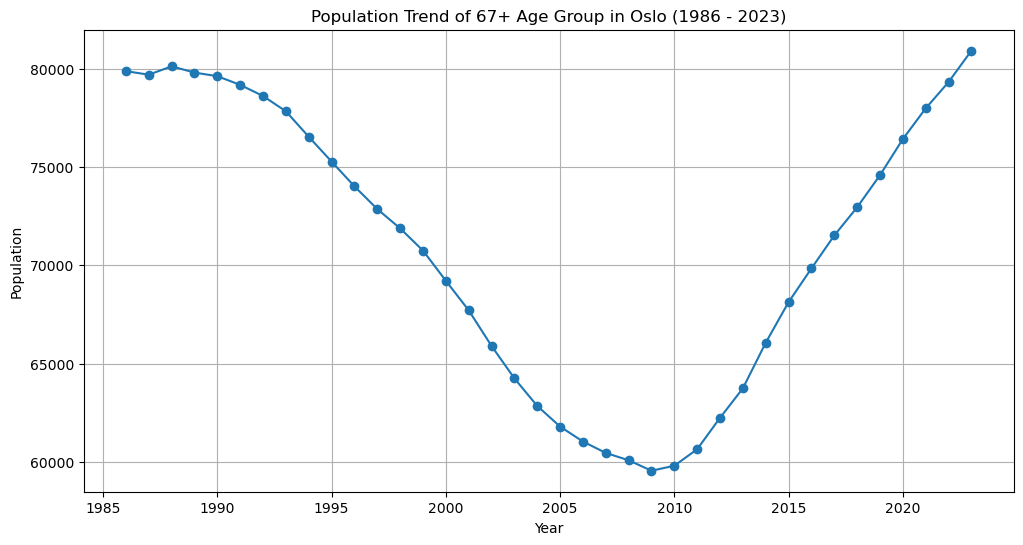

In [213]:


# Assuming 'df' is your DataFrame
# Filter data for the relevant age groups and the Oslo region
elderly_data_oslo = df[(df['region'] == 'K-0301 Oslo') & 
                       (df['alder'].isin(['67-79 år', '80-89 år', '90 år og eldre']))]

# Group by year, and sum the population
grouped_elderly_oslo = elderly_data_oslo.groupby('år')['Personer'].sum().reset_index()

# Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(grouped_elderly_oslo['år'], grouped_elderly_oslo['Personer'], marker='o')
plt.title('Population Trend of 67+ Age Group in Oslo (1986 - 2023)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.show()


In [214]:

# [Assuming 'grouped_elderly_oslo' is your DataFrame with the population data]

# Convert the year to a datetime object and set it as the index
grouped_elderly_oslo['år'] = pd.to_datetime(grouped_elderly_oslo['år'], format='%Y')
grouped_elderly_oslo.set_index('år', inplace=True)

# Split the data into training set
train = grouped_elderly_oslo[grouped_elderly_oslo.index.year <= 2023]['Personer']

train_size = int(len(grouped_elderly_oslo) * 0.8)
test_size = len(grouped_elderly_oslo) - train_size
train, test = grouped_elderly_oslo[0:train_size], grouped_elderly_oslo[train_size:len(grouped_elderly_oslo)]

In [215]:
# Fit the ARIMA model on the training data
arima_model = ARIMA(train, order=(1, 0, 0))  # Adjust the order as needed
arima_model_fit = arima_model.fit()

# Forecast using the ARIMA model
arima_forecast = arima_model_fit.forecast(steps=test_size)


/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [216]:
# Prepare data for linear regression (year as feature and population as target)
X_train = train.index.year.values.reshape(-1, 1)
y_train = train['Personer'].values
X_test = test.index.year.values.reshape(-1, 1)
y_test = test['Personer'].values

# Fit the Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions using the Linear Regression model
lin_reg_predictions = lin_reg.predict(X_test)


In [217]:
# Calculate MSE and R2 for ARIMA model
arima_mse = mean_squared_error(y_test, arima_forecast)
arima_r2 = r2_score(y_test, arima_forecast)

# Calculate MSE and R2 for Linear Regression model
lin_reg_mse = mean_squared_error(y_test, lin_reg_predictions)
lin_reg_r2 = r2_score(y_test, lin_reg_predictions)

# Print the evaluation metrics
print(f"ARIMA Model - MSE: {arima_mse}, R2: {arima_r2}")
print(f"Linear Regression Model - MSE: {lin_reg_mse}, R2: {lin_reg_r2}")


ARIMA Model - MSE: 65196806.79119509, R2: -3.9151647456862237
Linear Regression Model - MSE: 449351159.03534305, R2: -32.876428678437065


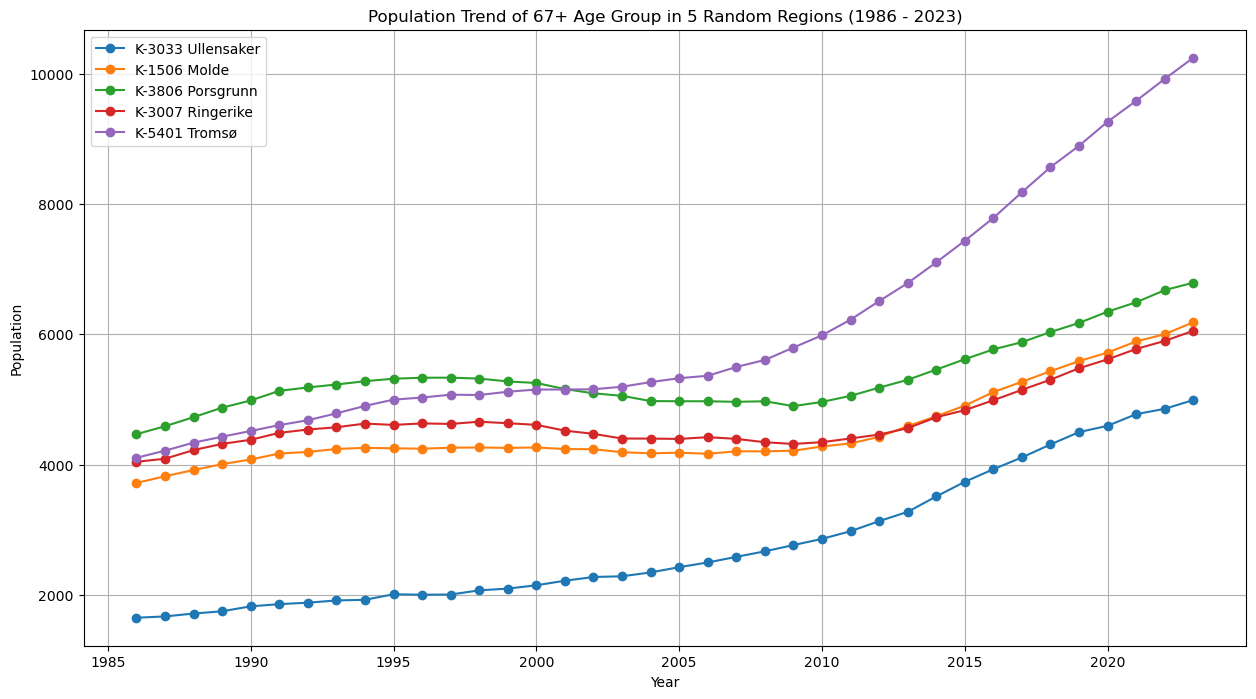

In [218]:
# Filter data for the relevant age groups across all regions
elderly_data = df[df['alder'].isin(['67-79 år', '80-89 år', '90 år og eldre'])]

# Select 5 random regions
random_regions = np.random.choice(elderly_data['region'].unique(), 5, replace=False)

# Set up the plot
plt.figure(figsize=(15, 8))

# Plotting the trend for each region
for region in random_regions:
    region_data = elderly_data[elderly_data['region'] == region]
    grouped_region_data = region_data.groupby('år')['Personer'].sum().reset_index()
    plt.plot(grouped_region_data['år'], grouped_region_data['Personer'], marker='o', label=region)

# Adding plot details
plt.title('Population Trend of 67+ Age Group in 5 Random Regions (1986 - 2023)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

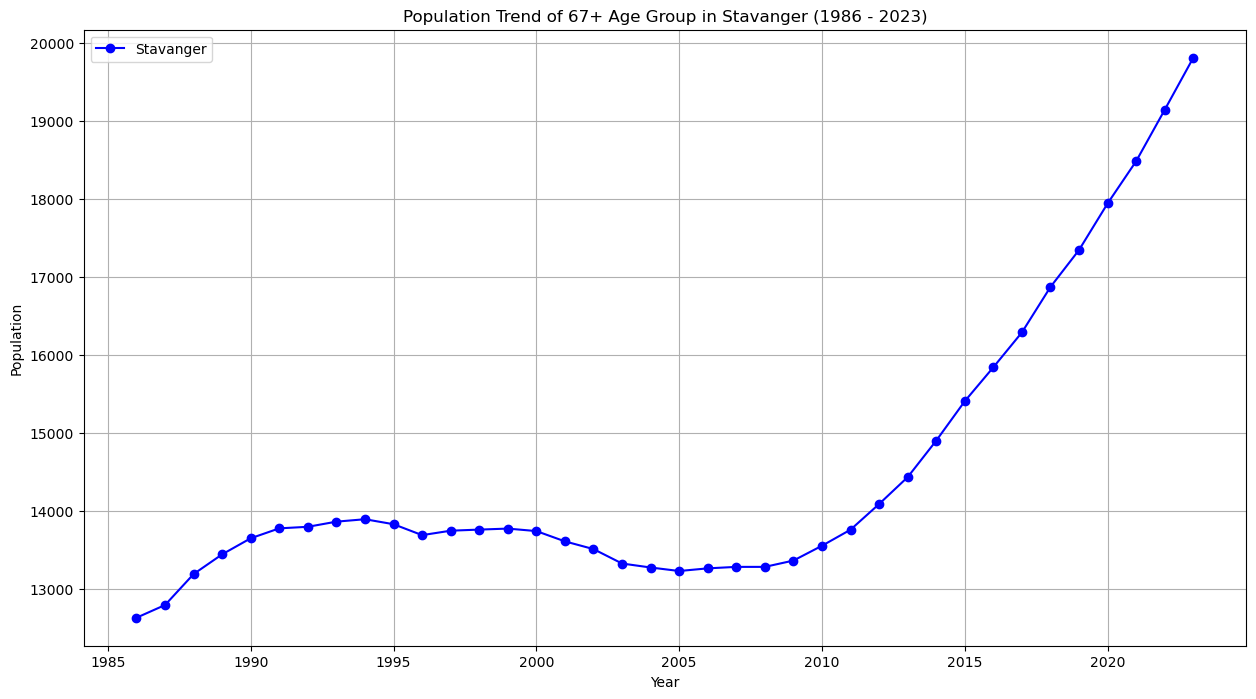

In [219]:


# Filter data for the relevant age groups in Stavanger
stavanger_data = elderly_data[elderly_data['region'] == 'K-1103 Stavanger']

# Group by year and sum the population
grouped_stavanger_data = stavanger_data.groupby('år')['Personer'].sum().reset_index()

# Set up the plot
plt.figure(figsize=(15, 8))

# Plotting the trend for Stavanger
plt.plot(grouped_stavanger_data['år'], grouped_stavanger_data['Personer'], marker='o', color='blue', label='Stavanger')

# Adding plot details
plt.title('Population Trend of 67+ Age Group in Stavanger (1986 - 2023)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


In [220]:
# Set the frequency of the time series data
grouped_elderly_oslo.index = pd.DatetimeIndex(grouped_elderly_oslo.index.values, 
                                              freq=grouped_elderly_oslo.index.inferred_freq)


In [221]:
# Filter the data to include only years from 2010 onwards
post_2010_data = grouped_elderly_oslo[grouped_elderly_oslo.index.year >= 2010]

# Calculate the training and test sizes for post-2010 data
train_size_post_2010 = int(len(post_2010_data) * 0.8)  # 80% of the data for training
test_size_post_2010 = len(post_2010_data) - train_size_post_2010  # the rest for testing

# Ensure the train and test sizes are correctly calculated
if test_size_post_2010 <= 0:
    raise ValueError("Test size must be a positive integer for post-2010 data")

# Split the data into training and test sets for post-2010 data
train_post_2010 = post_2010_data[:train_size_post_2010]['Personer']
test_post_2010 = post_2010_data[train_size_post_2010:]['Personer']

# Fit the ARIMA model on the training data for post-2010
arima_model_post_2010 = ARIMA(train_post_2010, order=(1, 0, 0))  # Adjust the order as needed
arima_model_post_2010_fit = arima_model_post_2010.fit()

# Forecast using the ARIMA model trained on post-2010 training data
arima_forecast_post_2010 = arima_model_post_2010_fit.forecast(steps=test_size_post_2010)

# Evaluate the model trained on post-2010 training data
mse_post_2010 = mean_squared_error(test_post_2010, arima_forecast_post_2010)
r2_post_2010 = r2_score(test_post_2010, arima_forecast_post_2010)

# Print the evaluation metrics for post-2010 data
print("ARIMA Model (Post-2010 Data) - MSE:", mse_post_2010, "R2:", r2_post_2010)



ARIMA Model (Post-2010 Data) - MSE: 13361074.886906998 R2: -8.30133402624886


In [222]:


X_train_post_2010 = np.array(post_2010_data.index.year[:train_size_post_2010]).reshape(-1, 1)
y_train_post_2010 = train_post_2010.values

X_test_post_2010 = np.array(post_2010_data.index.year[train_size_post_2010:]).reshape(-1, 1)
y_test_post_2010 = test_post_2010.values


In [223]:
# Fit the Linear Regression model
lin_reg_post_2010 = LinearRegression()
lin_reg_post_2010.fit(X_train_post_2010, y_train_post_2010)


LinearRegression()

In [224]:
# Make predictions using the Linear Regression model
lin_reg_predictions_post_2010 = lin_reg_post_2010.predict(X_test_post_2010)

# Evaluate the model
mse_lin_reg_post_2010 = mean_squared_error(y_test_post_2010, lin_reg_predictions_post_2010)
r2_lin_reg_post_2010 = r2_score(y_test_post_2010, lin_reg_predictions_post_2010)

# Print the evaluation metrics
print("Linear Regression Model (Post-2010 Data) - MSE:", mse_lin_reg_post_2010, "R2:", r2_lin_reg_post_2010)


Linear Regression Model (Post-2010 Data) - MSE: 315035.09501365275 R2: 0.7806878059201295


In [225]:
# Choose a single region for testing
test_region = 'K-3002 Moss'
regional_data = grouped_elderly[grouped_elderly['region'] == test_region].copy()
regional_data['år'] = pd.to_datetime(regional_data['år'], format='%Y')

# Define the range of starting years for training
start_years = range(1990, 2019)

# Dictionary to store evaluation metrics for each starting year
evaluation_metrics = {}

for start_year in start_years:
    data_for_training = regional_data[(regional_data['år'].dt.year >= start_year) & 
                                      (regional_data['år'].dt.year <= 2021)]
    X = data_for_training['år'].dt.year.values.reshape(-1, 1)
    y = data_for_training['Personer'].values

    lin_reg = LinearRegression()
    lin_reg.fit(X, y)

    predictions = lin_reg.predict(np.array([2022, 2023]).reshape(-1, 1))

    # Store predictions for each starting year
    evaluation_metrics[start_year] = predictions

# Print predictions for each starting year
for year, preds in evaluation_metrics.items():
    print(f"Start Year {year} - Predictions for 2022 and 2023: {preds}")


Start Year 1990 - Predictions for 2022 and 2023: [8238.83266129 8352.33009531]
Start Year 1991 - Predictions for 2022 and 2023: [8277.58709677 8394.60766129]
Start Year 1992 - Predictions for 2022 and 2023: [8318.27126437 8439.1059696 ]
Start Year 1993 - Predictions for 2022 and 2023: [8365.74630542 8491.17536946]
Start Year 1994 - Predictions for 2022 and 2023: [8418.34126984 8549.02983032]
Start Year 1995 - Predictions for 2022 and 2023: [8472.61823362 8608.92165242]
Start Year 1996 - Predictions for 2022 and 2023: [8527.28923077 8669.45025641]
Start Year 1997 - Predictions for 2022 and 2023: [8581.19 8729.34]
Start Year 1998 - Predictions for 2022 and 2023: [8637.38768116 8792.02202899]
Start Year 1999 - Predictions for 2022 and 2023: [8697.25296443 8859.07114625]
Start Year 2000 - Predictions for 2022 and 2023: [8762.14285714 8932.07227555]
Start Year 2001 - Predictions for 2022 and 2023: [8832.27142857 9011.34805195]
Start Year 2002 - Predictions for 2022 and 2023: [8900.04736842 

In [226]:
for start_year, predictions in evaluation_metrics.items():
    actual_2022 = regional_data.loc[regional_data['år'].dt.year == 2022, 'Personer'].values
    actual_2023 = regional_data.loc[regional_data['år'].dt.year == 2023, 'Personer'].values
    actual_values = np.array([actual_2022, actual_2023]).flatten()

    if len(actual_values) == 2:
        mse = mean_squared_error(actual_values, predictions)
        r2 = r2_score(actual_values, predictions)
        print(f"Start Year {start_year} - MSE: {mse:.2f}, R2: {r2:.2f}")
    else:
        print(f"Start Year {start_year} - Actual values for 2022 and 2023 are not available.")



Start Year 1990 - MSE: 1203566.38, R2: -67.04
Start Year 1991 - MSE: 1116259.45, R2: -62.10
Start Year 1992 - MSE: 1028018.95, R2: -57.12
Start Year 1993 - MSE: 929497.61, R2: -51.55
Start Year 1994 - MSE: 825983.18, R2: -45.69
Start Year 1995 - MSE: 725396.99, R2: -40.01
Start Year 1996 - MSE: 630512.49, R2: -34.64
Start Year 1997 - MSE: 543307.68, R2: -29.71
Start Year 1998 - MSE: 459124.11, R2: -24.96
Start Year 1999 - MSE: 377059.13, R2: -20.32
Start Year 2000 - MSE: 297039.58, R2: -15.79
Start Year 2001 - MSE: 221091.04, R2: -11.50
Start Year 2002 - MSE: 158160.88, R2: -7.94
Start Year 2003 - MSE: 110498.49, R2: -5.25
Start Year 2004 - MSE: 74052.41, R2: -3.19
Start Year 2005 - MSE: 46151.62, R2: -1.61
Start Year 2006 - MSE: 23888.04, R2: -0.35
Start Year 2007 - MSE: 7947.14, R2: 0.55
Start Year 2008 - MSE: 976.79, R2: 0.94
Start Year 2009 - MSE: 952.38, R2: 0.95
Start Year 2010 - MSE: 4716.75, R2: 0.73
Start Year 2011 - MSE: 8686.48, R2: 0.51
Start Year 2012 - MSE: 7556.39, R2: 0

In [227]:


# Loop over each region
for region in grouped_elderly['region'].unique():
    print(f"Region: {region}")

    # Define the degree of the polynomial
    poly_degree = 2  # You can adjust this degree

    for start_year in range(1986, 2010):  # Start years from 1991 to 2009
        # Filter data for training (from start_year to 2018)
        train_data = grouped_elderly[(grouped_elderly['region'] == region) & 
                                     (grouped_elderly['år'] >= start_year) & 
                                     (grouped_elderly['år'] < 2019)]
        X_train = train_data['år'].values.reshape(-1, 1)
        y_train = train_data['Personer'].values

        # Create a polynomial regression model
        model = make_pipeline(PolynomialFeatures(poly_degree), LinearRegression())
        model.fit(X_train, y_train)

        # Prepare test data (2019-2023)
        test_data = grouped_elderly[(grouped_elderly['region'] == region) & 
                                    (grouped_elderly['år'] >= 2019) & 
                                    (grouped_elderly['år'] <= 2023)]
        X_test = test_data['år'].values.reshape(-1, 1)
        y_test = test_data['Personer'].values

        # Predict and evaluate if test data is available
        if len(X_test) == len(y_test) and len(X_test) > 0:
            predictions = model.predict(X_test)
            mse = mean_squared_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)
            print(f"\tStart Year {start_year} - MSE: {mse:.2f}, R2: {r2:.2f}")
        else:
            print(f"\tStart Year {start_year} - Insufficient data for evaluation")



Region: K-0301 Oslo
	Start Year 1986 - MSE: 40502236.98, R2: -7.34
	Start Year 1987 - MSE: 27327385.43, R2: -4.63
	Start Year 1988 - MSE: 16370110.88, R2: -2.37
	Start Year 1989 - MSE: 8791018.73, R2: -0.81
	Start Year 1990 - MSE: 3753463.96, R2: 0.23
	Start Year 1991 - MSE: 1390109.73, R2: 0.71
	Start Year 1992 - MSE: 1366740.93, R2: 0.72
	Start Year 1993 - MSE: 3316320.83, R2: 0.32
	Start Year 1994 - MSE: 6803854.51, R2: -0.40
	Start Year 1995 - MSE: 12037834.65, R2: -1.48
	Start Year 1996 - MSE: 19003274.14, R2: -2.91
	Start Year 1997 - MSE: 27596834.70, R2: -4.68
	Start Year 1998 - MSE: 37110325.39, R2: -6.64
	Start Year 1999 - MSE: 45575915.85, R2: -8.38
	Start Year 2000 - MSE: 51476118.00, R2: -9.60
	Start Year 2001 - MSE: 55259982.66, R2: -10.38
	Start Year 2002 - MSE: 55766445.18, R2: -10.48
	Start Year 2003 - MSE: 55113352.65, R2: -10.35
	Start Year 2004 - MSE: 53564082.83, R2: -10.03
	Start Year 2005 - MSE: 51065775.86, R2: -9.51
	Start Year 2006 - MSE: 46240211.76, R2: -8.52

In [228]:


# Loop over each region
for region in grouped_elderly['region'].unique():
    print(f"Region: {region}")

    # Define the degree of the polynomial
    poly_degree = 3  # You can adjust this degree

    for start_year in range(1986, 2010):  # Start years from 1991 to 2009
        # Filter data for training (from start_year to 2018)
        train_data = grouped_elderly[(grouped_elderly['region'] == region) & 
                                     (grouped_elderly['år'] >= start_year) & 
                                     (grouped_elderly['år'] < 2019)]
        X_train = train_data['år'].values.reshape(-1, 1)
        y_train = train_data['Personer'].values

        # Create a polynomial regression model
        model = make_pipeline(PolynomialFeatures(poly_degree), LinearRegression())
        model.fit(X_train, y_train)

        # Prepare test data (2019-2023)
        test_data = grouped_elderly[(grouped_elderly['region'] == region) & 
                                    (grouped_elderly['år'] >= 2019) & 
                                    (grouped_elderly['år'] <= 2023)]
        X_test = test_data['år'].values.reshape(-1, 1)
        y_test = test_data['Personer'].values

        # Predict and evaluate if test data is available
        if len(X_test) == len(y_test) and len(X_test) > 0:
            predictions = model.predict(X_test)
            mse = mean_squared_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)
            print(f"\tStart Year {start_year} - MSE: {mse:.2f}, R2: {r2:.2f}")
        else:
            print(f"\tStart Year {start_year} - Insufficient data for evaluation")

Region: K-0301 Oslo
	Start Year 1986 - MSE: 152531200.73, R2: -30.41
	Start Year 1987 - MSE: 157904206.30, R2: -31.51
	Start Year 1988 - MSE: 157915864.05, R2: -31.52
	Start Year 1989 - MSE: 159267871.35, R2: -31.79
	Start Year 1990 - MSE: 156859261.64, R2: -31.30
	Start Year 1991 - MSE: 153726819.32, R2: -30.65
	Start Year 1992 - MSE: 149486879.87, R2: -29.78
	Start Year 1993 - MSE: 145264397.06, R2: -28.91
	Start Year 1994 - MSE: 141551817.84, R2: -28.15
	Start Year 1995 - MSE: 132606711.26, R2: -26.30
	Start Year 1996 - MSE: 118087978.27, R2: -23.31
	Start Year 1997 - MSE: 97811120.45, R2: -19.14
	Start Year 1998 - MSE: 74367260.37, R2: -14.31
	Start Year 1999 - MSE: 53595974.54, R2: -10.04
	Start Year 2000 - MSE: 37902706.78, R2: -6.80
	Start Year 2001 - MSE: 24852225.22, R2: -4.12
	Start Year 2002 - MSE: 16201500.97, R2: -2.34
	Start Year 2003 - MSE: 8348766.04, R2: -0.72
	Start Year 2004 - MSE: 2083045.40, R2: 0.57
	Start Year 2005 - MSE: 559387.02, R2: 0.88
	Start Year 2006 - MS

In [229]:


# Loop over each region
for region in grouped_elderly['region'].unique():
    print(f"Region: {region}")

    for start_year in range(1986, 2010):  # Start years from 1991 to 2000
        # Filter data for training (from start_year to 2018)
        train_data = grouped_elderly[(grouped_elderly['region'] == region) & 
                                     (grouped_elderly['år'] >= start_year) & 
                                     (grouped_elderly['år'] < 2019)]
        X_train = train_data['år'].values.reshape(-1, 1)
        y_train = train_data['Personer'].values

        # Train the model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Prepare test data (2019-2023)
        test_data = grouped_elderly[(grouped_elderly['region'] == region) & 
                                    (grouped_elderly['år'] >= 2019) & 
                                    (grouped_elderly['år'] <= 2023)]
        X_test = test_data['år'].values.reshape(-1, 1)
        y_test = test_data['Personer'].values

        # Predict and evaluate if test data is available
        if len(X_test) == len(y_test) and len(X_test) > 0:
            predictions = model.predict(X_test)
            mse = mean_squared_error(y_test, predictions)
            r2 = r2_score(y_test, predictions)
            print(f"\tStart Year {start_year} - MSE: {mse:.2f}, R2: {r2:.2f}")
        else:
            print(f"\tStart Year {start_year} - Insufficient data for evaluation")


Region: K-0301 Oslo
	Start Year 1986 - MSE: 352888531.97, R2: -71.66
	Start Year 1987 - MSE: 349229854.55, R2: -70.91
	Start Year 1988 - MSE: 343800658.61, R2: -69.79
	Start Year 1989 - MSE: 334342667.39, R2: -67.84
	Start Year 1990 - MSE: 322610839.88, R2: -65.43
	Start Year 1991 - MSE: 307809425.40, R2: -62.38
	Start Year 1992 - MSE: 290386876.52, R2: -58.79
	Start Year 1993 - MSE: 270450883.08, R2: -54.69
	Start Year 1994 - MSE: 248482480.08, R2: -50.16
	Start Year 1995 - MSE: 226149766.72, R2: -45.56
	Start Year 1996 - MSE: 203435064.07, R2: -40.89
	Start Year 1997 - MSE: 180434334.52, R2: -36.15
	Start Year 1998 - MSE: 156946276.06, R2: -31.32
	Start Year 1999 - MSE: 132544386.16, R2: -26.29
	Start Year 2000 - MSE: 107952519.68, R2: -21.23
	Start Year 2001 - MSE: 84857600.06, R2: -16.47
	Start Year 2002 - MSE: 63667085.93, R2: -12.11
	Start Year 2003 - MSE: 45787512.00, R2: -8.43
	Start Year 2004 - MSE: 31242584.03, R2: -5.43
	Start Year 2005 - MSE: 19841062.62, R2: -3.09
	Start Y

In [230]:



# Define the window size (number of lags)
window_size = 10  # Adjust as needed

# Loop over each region
for region in grouped_elderly['region'].unique():
    print(f"Region: {region}")

    # Filter data for training and testing
    data = grouped_elderly[grouped_elderly['region'] == region]
    y = data['Personer'].values

    # Initialize lists to store predictions and actual values
    predictions = []
    actual = []

    # Iterate over the time series with a sliding window
    for end in range(window_size, len(y)):
        train = y[end-window_size:end]
        test = y[end] if end < len(y) else None

        # Fit the ARIMA model
        model = sm.tsa.ARIMA(train, order=(1, 1, 0))  # Adjust the order as needed
        model_fit = model.fit()

        # Forecast the next value
        forecast = model_fit.forecast()[0]

        # Store the actual value and prediction for comparison
        if test is not None:
            predictions.append(forecast)
            actual.append(test)

    # Calculate MSE and R2 score after collecting all predictions
    if len(actual) > 0 and len(predictions) > 0:
        mse = mean_squared_error(actual, predictions)
        r2 = r2_score(actual, predictions)
        print(f"\tARIMA Model (Region {region}) - MSE: {mse:.2f}, R2: {r2:.2f}")
    else:
        print(f"\tInsufficient data for evaluation in Region {region}")



Region: K-0301 Oslo


/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


	ARIMA Model (Region K-0301 Oslo) - MSE: 1932874.02, R2: 0.95
Region: K-1103 Stavanger
	ARIMA Model (Region K-1103 Stavanger) - MSE: 11265.48, R2: 1.00
Region: K-1106 Haugesund


/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


	ARIMA Model (Region K-1106 Haugesund) - MSE: 1396.85, R2: 0.99
Region: K-1506 Molde
	ARIMA Model (Region K-1506 Molde) - MSE: 1636.49, R2: 1.00
Region: K-1833 Rana


/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


	ARIMA Model (Region K-1833 Rana) - MSE: 1725.49, R2: 0.99
Region: K-3002 Moss
	ARIMA Model (Region K-3002 Moss) - MSE: 4576.65, R2: 1.00
Region: K-3005 Drammen


/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


	ARIMA Model (Region K-3005 Drammen) - MSE: 14425.87, R2: 1.00
Region: K-3007 Ringerike
	ARIMA Model (Region K-3007 Ringerike) - MSE: 1860.60, R2: 0.99
Region: K-3029 Lørenskog


/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


	ARIMA Model (Region K-3029 Lørenskog) - MSE: 964.18, R2: 1.00
Region: K-3030 Lillestrøm
	ARIMA Model (Region K-3030 Lillestrøm) - MSE: 7831.30, R2: 1.00
Region: K-3033 Ullensaker


/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


	ARIMA Model (Region K-3033 Ullensaker) - MSE: 2107.66, R2: 1.00
Region: K-3407 Gjøvik
	ARIMA Model (Region K-3407 Gjøvik) - MSE: 630.79, R2: 1.00
Region: K-3802 Holmestrand


/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


	ARIMA Model (Region K-3802 Holmestrand) - MSE: 1345.69, R2: 1.00
Region: K-3803 Tønsberg
	ARIMA Model (Region K-3803 Tønsberg) - MSE: 4962.51, R2: 1.00
Region: K-3806 Porsgrunn


/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


	ARIMA Model (Region K-3806 Porsgrunn) - MSE: 2815.58, R2: 0.99
Region: K-3807 Skien
	ARIMA Model (Region K-3807 Skien) - MSE: 4448.57, R2: 1.00
Region: K-4204 Kristiansand
	ARIMA Model (Region K-4204 Kristiansand) - MSE: 8036.26, R2: 1.00
Region: K-4601 Bergen
	ARIMA Model (Region K-4601 Bergen) - MSE: 179094.62, R2: 0.99
Region: K-5001 Trondheim - Tråante


/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


	ARIMA Model (Region K-5001 Trondheim - Tråante) - MSE: 19577.31, R2: 1.00
Region: K-5401 Tromsø
	ARIMA Model (Region K-5401 Tromsø) - MSE: 2128.89, R2: 1.00


/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [231]:
# ... previous code ...

# Loop over each region
for region in grouped_elderly['region'].unique():
    print(f"Region: {region}")

    # Filter data for training (up to 2018) and testing (2019-2023)
    train_data = grouped_elderly[(grouped_elderly['region'] == region) & (grouped_elderly['år'] < 2019)]
    test_data = grouped_elderly[(grouped_elderly['region'] == region) & (grouped_elderly['år'] >= 2019) & (grouped_elderly['år'] <= 2023)]

    # Prepare training and testing data
    y_train = train_data['Personer'].values
    y_test = test_data['Personer'].values
    test_years = pd.to_datetime(test_data['år'], format='%Y').dt.year  # corrected line

    # Fit the ARIMA model (order can be adjusted as needed)
    model = sm.tsa.ARIMA(y_train, order=(1, 2, 0))
    model_fit = model.fit()

    # Make predictions for 2019-2023
    start = len(y_train)
    end = start + len(y_test) - 1
    predictions = model_fit.predict(start=start, end=end, typ='levels')

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"\tARIMA Model - MSE: {mse:.2f}, R2: {r2:.2f}")

# ... remaining code ...


Region: K-0301 Oslo
	ARIMA Model - MSE: 346421.02, R2: 0.93
Region: K-1103 Stavanger
	ARIMA Model - MSE: 7732.61, R2: 0.99
Region: K-1106 Haugesund
	ARIMA Model - MSE: 721.78, R2: 0.99
Region: K-1506 Molde
	ARIMA Model - MSE: 2101.93, R2: 0.95
Region: K-1833 Rana
	ARIMA Model - MSE: 2491.73, R2: 0.88
Region: K-3002 Moss
	ARIMA Model - MSE: 74245.92, R2: 0.37
Region: K-3005 Drammen
	ARIMA Model - MSE: 13122.48, R2: 0.94
Region: K-3007 Ringerike
	ARIMA Model - MSE: 525.43, R2: 0.99
Region: K-3029 Lørenskog
	ARIMA Model - MSE: 13822.14, R2: 0.86
Region: K-3030 Lillestrøm
	ARIMA Model - MSE: 35327.03, R2: 0.75
Region: K-3033 Ullensaker
	ARIMA Model - MSE: 31598.84, R2: -0.01
Region: K-3407 Gjøvik
	ARIMA Model - MSE: 242.37, R2: 0.99
Region: K-3802 Holmestrand
	ARIMA Model - MSE: 1652.33, R2: 0.97
Region: K-3803 Tønsberg
	ARIMA Model - MSE: 33199.27, R2: 0.81
Region: K-3806 Porsgrunn


/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys([

	ARIMA Model - MSE: 1635.57, R2: 0.97
Region: K-3807 Skien
	ARIMA Model - MSE: 13391.11, R2: 0.87
Region: K-4204 Kristiansand
	ARIMA Model - MSE: 3884.40, R2: 0.99
Region: K-4601 Bergen
	ARIMA Model - MSE: 26200.58, R2: 0.98
Region: K-5001 Trondheim - Tråante
	ARIMA Model - MSE: 309971.22, R2: 0.75
Region: K-5401 Tromsø
	ARIMA Model - MSE: 26100.64, R2: 0.88


/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [232]:
# Loop over each region
for region in grouped_elderly['region'].unique():
    print(f"Region: {region}")

    # Filter data for training (up to 2018) and testing (2019-2023)
    train_data = grouped_elderly[(grouped_elderly['region'] == region) & (grouped_elderly['år'] < 2019)]
    test_data = grouped_elderly[(grouped_elderly['region'] == region) & (grouped_elderly['år'] >= 2019) & (grouped_elderly['år'] <= 2023)]

    # Prepare training and testing data
    y_train = train_data['Personer'].values
    y_test = test_data['Personer'].values
    test_years = pd.to_datetime(test_data['år'], format='%Y').dt.year  # corrected line

    # Fit the ARIMA model (order can be adjusted as needed)
    model = sm.tsa.ARIMA(y_train, order=(1,1, 0))
    model_fit = model.fit()

    # Make predictions for 2019-2023
    start = len(y_train)
    end = start + len(y_test) - 1
    predictions = model_fit.predict(start=start, end=end, typ='levels')

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"\tARIMA Model - MSE: {mse:.2f}, R2: {r2:.2f}")

# ... remaining code ...


Region: K-0301 Oslo
	ARIMA Model - MSE: 28586520.27, R2: -4.89
Region: K-1103 Stavanger
	ARIMA Model - MSE: 217569.81, R2: 0.71
Region: K-1106 Haugesund
	ARIMA Model - MSE: 9551.13, R2: 0.84
Region: K-1506 Molde
	ARIMA Model - MSE: 720.91, R2: 0.98
Region: K-1833 Rana
	ARIMA Model - MSE: 33468.65, R2: -0.55
Region: K-3002 Moss
	ARIMA Model - MSE: 48941.12, R2: 0.58
Region: K-3005 Drammen
	ARIMA Model - MSE: 252518.46, R2: -0.23
Region: K-3007 Ringerike
	ARIMA Model - MSE: 19983.04, R2: 0.51
Region: K-3029 Lørenskog
	ARIMA Model - MSE: 8967.34, R2: 0.91
Region: K-3030 Lillestrøm
	ARIMA Model - MSE: 6838.03, R2: 0.95
Region: K-3033 Ullensaker
	ARIMA Model - MSE: 13774.04, R2: 0.56
Region: K-3407 Gjøvik
	ARIMA Model - MSE: 8973.20, R2: 0.58
Region: K-3802 Holmestrand
	ARIMA Model - MSE: 16331.29, R2: 0.71
Region: K-3803 Tønsberg
	ARIMA Model - MSE: 25571.11, R2: 0.85
Region: K-3806 Porsgrunn
	ARIMA Model - MSE: 12512.62, R2: 0.75
Region: K-3807 Skien
	ARIMA Model - MSE: 11940.55, R2: 0.89

/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown

In [233]:
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

# Define the regions based on R2 score criteria
regions_to_forecast = [
    'K-1103 Stavanger', 'K-1106 Haugesund', 'K-1506 Molde', 'K-3007 Ringerike', 
    'K-3029 Lørenskog', 'K-3030 Lillestrøm',  'K-3407 Gjøvik', 
    'K-3802 Holmestrand', 'K-3803 Tønsberg', 'K-3806 Porsgrunn', 
    'K-3807 Skien', 'K-4204 Kristiansand', 'K-5401 Tromsø', 'K-0301 Oslo', 
    'K-5001 Trondheim - Tråante', 'K-4601 Bergen','K-3807 Skien','K-3005 Drammen','K-1833 Rana'
]

# Dictionary to store forecasts
forecasts_2023_to_2030 = {}

# Loop over each region and perform forecasting
for region in regions_to_forecast:
    print(f"Forecasting for Region: {region}")

    # Filter data for the current region
    region_data = grouped_elderly[grouped_elderly['region'] == region]

    # Prepare the data for ARIMA model
    y = region_data['Personer'].values
    dates = pd.to_datetime(region_data['år'], format='%Y')

    # Fit the ARIMA model (assuming order (1, 1, 0))
    model = sm.tsa.ARIMA(y, order=(1, 2, 0))
    model_fit = model.fit()

    # Forecasting from 2023 to 2030
    forecast_start_year = 2023
    forecast_end_year = 2030
    forecast_length = forecast_end_year - forecast_start_year + 1
    forecast_start_index = forecast_start_year - dates.iloc[0].year

    # Make predictions
    forecast = model_fit.predict(start=forecast_start_index, end=forecast_start_index + forecast_length - 1, typ='levels')

    # Generate dates for the forecast period
    forecast_dates = pd.date_range(start=pd.to_datetime(forecast_start_year, format='%Y'), 
                                   periods=forecast_length, 
                                   freq='Y')

    # Store the forecast in the dictionary
    forecasts_2023_to_2030[region] = {year.strftime('%Y'): value for year, value in zip(forecast_dates, forecast)}

# Print the forecasts
print("\nForecasts from 2024 to 2030:")
print(forecasts_2023_to_2030)


Forecasting for Region: K-1103 Stavanger
Forecasting for Region: K-1106 Haugesund
Forecasting for Region: K-1506 Molde
Forecasting for Region: K-3007 Ringerike
Forecasting for Region: K-3029 Lørenskog
Forecasting for Region: K-3030 Lillestrøm
Forecasting for Region: K-3407 Gjøvik
Forecasting for Region: K-3802 Holmestrand
Forecasting for Region: K-3803 Tønsberg
Forecasting for Region: K-3806 Porsgrunn
Forecasting for Region: K-3807 Skien
Forecasting for Region: K-4204 Kristiansand
Forecasting for Region: K-5401 Tromsø
Forecasting for Region: K-0301 Oslo
Forecasting for Region: K-5001 Trondheim - Tråante
Forecasting for Region: K-4601 Bergen
Forecasting for Region: K-3807 Skien
Forecasting for Region: K-3005 Drammen
Forecasting for Region: K-1833 Rana

Forecasts from 2024 to 2030:
{'K-1103 Stavanger': {'2023': 19762.646650600327, '2024': 20473.377548758992, '2025': 21138.614753831916, '2026': 21803.570158058927, '2027': 22468.6179384082, '2028': 23133.635437272915, '2029': 23798.6628626

/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys([

In [129]:
# Convert forecasts dictionary to DataFrame
forecasts_df = pd.DataFrame(columns=['Region', 'Year', 'Forecast'])

# Populate the DataFrame
for region, yearly_forecasts in forecasts_2023_to_2030.items():
    for year, forecast in yearly_forecasts.items():
        forecasts_df = forecasts_df.append({'Region': region, 'Year': year, 'Forecast': forecast}, ignore_index=True)

# Sort the DataFrame for better organization
forecasts_df = forecasts_df.sort_values(by=['Region', 'Year'])

# Save to CSV file
csv_filename = 'forecasts_2023_to_2030.csv'
forecasts_df.to_csv(csv_filename, index=False)

print(f"Forecasts saved to {csv_filename}")


Forecasts saved to forecasts_2023_to_2030.csv


/var/folders/dg/64b0p1yx17dgtv62qtpnxhm00000gn/T/ipykernel_82420/755036774.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasts_df = forecasts_df.append({'Region': region, 'Year': year, 'Forecast': forecast}, ignore_index=True)
/var/folders/dg/64b0p1yx17dgtv62qtpnxhm00000gn/T/ipykernel_82420/755036774.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasts_df = forecasts_df.append({'Region': region, 'Year': year, 'Forecast': forecast}, ignore_index=True)
/var/folders/dg/64b0p1yx17dgtv62qtpnxhm00000gn/T/ipykernel_82420/755036774.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecasts_df = forecasts_df.append({'Region': region, 'Year': year, 'Forecast': forecast}, ignore_index=True)
/var/folders/dg/64b0p1

In [234]:

regions_to_forecast = ['K-3033 Ullensaker',
    'K-3002 Moss'
]

# Dictionary to store forecasts
forecasts_2024_to_2030 = {}

# Loop over each region and perform forecasting
for region in regions_to_forecast:
    print(f"Forecasting for Region: {region}")

    # Filter data for the current region
    region_data = grouped_elderly[grouped_elderly['region'] == region]

    # Prepare the data for ARIMA model
    y = region_data['Personer'].values
    dates = pd.to_datetime(region_data['år'], format='%Y')

    # Fit the ARIMA model (assuming order (1, 1, 0))
    model = sm.tsa.ARIMA(y, order=(1, 1, 0))
    model_fit = model.fit()

    # Forecasting from 2023 to 2030
    forecast_start_year = 2023
    forecast_end_year = 2030
    forecast_length = forecast_end_year - forecast_start_year + 1
    forecast_start_index = forecast_start_year - dates.iloc[0].year

    # Make predictions
    forecast = model_fit.predict(start=forecast_start_index, end=forecast_start_index + forecast_length - 1, typ='levels')

    # Generate dates for the forecast period
    forecast_dates = pd.date_range(start=pd.to_datetime(forecast_start_year, format='%Y'), 
                                   periods=forecast_length, 
                                   freq='Y')

    # Store the forecast in the dictionary
    forecasts_2024_to_2030[region] = {year.strftime('%Y'): value for year, value in zip(forecast_dates, forecast)}

# Print the forecasts
print("\nForecasts from 2024 to 2030:")
print(forecasts_2024_to_2030)


Forecasting for Region: K-3033 Ullensaker
Forecasting for Region: K-3002 Moss

Forecasts from 2024 to 2030:
{'K-3033 Ullensaker': {'2023': 4930.118499694312, '2024': 5113.670700716244, '2025': 5226.9628652765905, '2026': 5330.747468067984, '2027': 5425.8223906662715, '2028': 5512.918555838663, '2029': 5592.7055467762, '2030': 5665.796754756095}, 'K-3002 Moss': {'2023': 9499.597775301567, '2024': 9769.301558130599, '2025': 9997.363428572557, '2026': 10208.536338497493, '2027': 10404.070987931646, '2028': 10585.125457195376, '2029': 10752.772065789983, '2030': 10908.003723354503}}


/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [235]:
csv_filename = 'forecasts_2023_to_2030.csv'
forecasts_df = pd.read_csv(csv_filename)

# Display the first few rows
print(forecasts_df.head())

        Region  Year      Forecast
0  K-0301 Oslo  2023  80667.637851
1  K-0301 Oslo  2024  82489.436117
2  K-0301 Oslo  2025  84068.935653
3  K-0301 Oslo  2026  85648.366916
4  K-0301 Oslo  2027  87227.802562


In [236]:
print("Keys in forecasts_2023_to_2030 dictionary:")
print(forecasts_2023_to_2030.keys())


Keys in forecasts_2023_to_2030 dictionary:
dict_keys(['K-1103 Stavanger', 'K-1106 Haugesund', 'K-1506 Molde', 'K-3007 Ringerike', 'K-3029 Lørenskog', 'K-3030 Lillestrøm', 'K-3407 Gjøvik', 'K-3802 Holmestrand', 'K-3803 Tønsberg', 'K-3806 Porsgrunn', 'K-3807 Skien', 'K-4204 Kristiansand', 'K-5401 Tromsø', 'K-0301 Oslo', 'K-5001 Trondheim - Tråante', 'K-4601 Bergen', 'K-3005 Drammen', 'K-1833 Rana'])


In [237]:
new_forecasts = {
    'K-3033 Ullensaker': {'2023': 4930.118499694312, '2024': 5113.670700716244, '2025': 5226.9628652765905, '2026': 5330.747468067984, '2027': 5425.8223906662715, '2028': 5512.918555838663, '2029': 5592.7055467762, '2030': 5665.796754756095},
    'K-3002 Moss': {'2023': 9499.597775301567, '2024': 9769.301558130599, '2025': 9997.363428572557, '2026': 10208.536338497493, '2027': 10404.070987931646, '2028': 10585.125457195376, '2029': 10752.772065789983, '2030': 10908.003723354503}
}

# Update the original forecasts dictionary with the new forecasts
forecasts_2023_to_2030.update(new_forecasts)

# Convert to DataFrame for exporting to CSV
df_forecasts = pd.DataFrame([(region, year, forecast) for region, yearly_forecasts in forecasts_2023_to_2030.items() for year, forecast in yearly_forecasts.items()], columns=['Region', 'Year', 'Forecast'])

# Save the updated forecasts to a CSV file
csv_filename_updated = 'updated_forecasts_2023_to_2030.csv'
df_forecasts.to_csv(csv_filename_updated, index=False)

print(f"Updated forecasts saved to {csv_filename_updated}")

Updated forecasts saved to updated_forecasts_2023_to_2030.csv


In [238]:
csv_filename_updated = 'updated_forecasts_2023_to_2030.csv'
updated_forecasts_df = pd.read_csv(csv_filename_updated)

# Display the unique regions in the dataset to confirm all are present
unique_regions = updated_forecasts_df['Region'].unique()
unique_regions.sort()
unique_regions

array(['K-0301 Oslo', 'K-1103 Stavanger', 'K-1106 Haugesund',
       'K-1506 Molde', 'K-1833 Rana', 'K-3002 Moss', 'K-3005 Drammen',
       'K-3007 Ringerike', 'K-3029 Lørenskog', 'K-3030 Lillestrøm',
       'K-3033 Ullensaker', 'K-3407 Gjøvik', 'K-3802 Holmestrand',
       'K-3803 Tønsberg', 'K-3806 Porsgrunn', 'K-3807 Skien',
       'K-4204 Kristiansand', 'K-4601 Bergen',
       'K-5001 Trondheim - Tråante', 'K-5401 Tromsø'], dtype=object)

In [239]:
# Assuming 'grouped_elderlyMMM' and 'forecasts_2023_to_2030' are defined

# Ensure 'Year' in 'grouped_elderlyMMM' is a string
grouped_elderlyMMM['Year'] = grouped_elderlyMMM['Year'].astype(str)

# Extract ARIMA forecasts for "K-3803 Tønsberg"
arima_forecasts = forecasts_2023_to_2030.get('K-3005 Drammen', {})

# Extract MMM forecasts for "3803 Tønsberg" and convert to dictionary
mmm_forecasts = grouped_elderlyMMM[grouped_elderlyMMM['Municipality'] == '3005 Drammen']
mmm_forecasts = mmm_forecasts.set_index('Year')['Personer'].to_dict()

# Initialize a dictionary to store the percentage differences
percentage_differences = {}

# Calculate the percentage differences for each year from 2023 to 2030
for year in range(2023, 2031):
    year_str = str(year)
    arima_forecast = arima_forecasts.get(year_str)
    mmm_forecast = mmm_forecasts.get(year_str)
    
    if arima_forecast is not None and mmm_forecast is not None:
        percentage_difference = ((arima_forecast - float(mmm_forecast)) / float(mmm_forecast)) * 100
        percentage_differences[year_str] = percentage_difference

# Print the percentage differences
print("Percentage Differences between ARIMA and MMM forecasts (3803 Tønsberg):")
for year, diff in percentage_differences.items():
    print(f"{year}: {diff:.2f}%")


Percentage Differences between ARIMA and MMM forecasts (3803 Tønsberg):
2023: -0.30%
2024: -0.03%
2025: 0.14%
2026: 0.17%
2027: 0.17%
2028: -0.04%
2029: -0.16%
2030: -0.48%


In [240]:
# Assuming 'grouped_elderlyMMM' and 'forecasts_2023_to_2030' are defined

# Ensure 'Year' in 'grouped_elderlyMMM' is a string
grouped_elderlyMMM['Year'] = grouped_elderlyMMM['Year'].astype(str)

# Extract ARIMA forecasts for "K-3803 Tønsberg"
arima_forecasts = forecasts_2023_to_2030.get('K-1106 Haugesund', {})

# Extract MMM forecasts for "3803 Tønsberg" and convert to dictionary
mmm_forecasts = grouped_elderlyMMM[grouped_elderlyMMM['Municipality'] == '1106 Haugesund']
mmm_forecasts = mmm_forecasts.set_index('Year')['Personer'].to_dict()

# Initialize a dictionary to store the percentage differences
percentage_differences = {}

# Calculate the percentage differences for each year from 2023 to 2030
for year in range(2023, 2031):
    year_str = str(year)
    arima_forecast = arima_forecasts.get(year_str)
    mmm_forecast = mmm_forecasts.get(year_str)
    
    if arima_forecast is not None and mmm_forecast is not None:
        percentage_difference = ((arima_forecast - float(mmm_forecast)) / float(mmm_forecast)) * 100
        percentage_differences[year_str] = percentage_difference

# Print the percentage differences
print("Percentage Differences between ARIMA and MMM forecasts (3803 Tønsberg):")
for year, diff in percentage_differences.items():
    print(f"{year}: {diff:.2f}%")


Percentage Differences between ARIMA and MMM forecasts (3803 Tønsberg):
2023: -0.01%
2024: 0.56%
2025: 0.48%
2026: 0.24%
2027: 0.38%
2028: 0.44%
2029: 0.78%
2030: 1.13%


In [241]:
# Assuming 'grouped_elderlyMMM' and 'forecasts_2023_to_2030' are defined

# Ensure 'Year' in 'grouped_elderlyMMM' is a string
grouped_elderlyMMM['Year'] = grouped_elderlyMMM['Year'].astype(str)

# Extract ARIMA forecasts for "K-3803 Tønsberg"
arima_forecasts = forecasts_2023_to_2030.get('K-1103 Stavanger', {})

# Extract MMM forecasts for "3803 Tønsberg" and convert to dictionary
mmm_forecasts = grouped_elderlyMMM[grouped_elderlyMMM['Municipality'] == '1103 Stavanger']
mmm_forecasts = mmm_forecasts.set_index('Year')['Personer'].to_dict()

# Initialize a dictionary to store the percentage differences
percentage_differences = {}

# Calculate the percentage differences for each year from 2023 to 2030
for year in range(2023, 2031):
    year_str = str(year)
    arima_forecast = arima_forecasts.get(year_str)
    mmm_forecast = mmm_forecasts.get(year_str)
    
    if arima_forecast is not None and mmm_forecast is not None:
        percentage_difference = ((arima_forecast - float(mmm_forecast)) / float(mmm_forecast)) * 100
        percentage_differences[year_str] = percentage_difference

# Print the percentage differences
print("Percentage Differences between ARIMA and MMM forecasts (3803 Tønsberg):")
for year, diff in percentage_differences.items():
    print(f"{year}: {diff:.2f}%")



Percentage Differences between ARIMA and MMM forecasts (3803 Tønsberg):
2023: -0.28%
2024: 0.35%
2025: 0.29%
2026: 0.24%
2027: 0.20%
2028: 0.04%
2029: -0.03%
2030: -0.24%


In [242]:
# Assuming 'grouped_elderlyMMM' and 'forecasts_2023_to_2030' are defined

# Ensure 'Year' in 'grouped_elderlyMMM' is a string
grouped_elderlyMMM['Year'] = grouped_elderlyMMM['Year'].astype(str)

# Extract ARIMA forecasts for "K-3803 Tønsberg"
arima_forecasts = forecasts_2023_to_2030.get('K-3002 Moss', {})

# Extract MMM forecasts for "3803 Tønsberg" and convert to dictionary
mmm_forecasts = grouped_elderlyMMM[grouped_elderlyMMM['Municipality'] == '3002 Moss']
mmm_forecasts = mmm_forecasts.set_index('Year')['Personer'].to_dict()

# Initialize a dictionary to store the percentage differences
percentage_differences = {}

# Calculate the percentage differences for each year from 2023 to 2030
for year in range(2023, 2031):
    year_str = str(year)
    arima_forecast = arima_forecasts.get(year_str)
    mmm_forecast = mmm_forecasts.get(year_str)
    
    if arima_forecast is not None and mmm_forecast is not None:
        percentage_difference = ((arima_forecast - float(mmm_forecast)) / float(mmm_forecast)) * 100
        percentage_differences[year_str] = percentage_difference

# Print the percentage differences
print("Percentage Differences between ARIMA and MMM forecasts (3803 Tønsberg):")
for year, diff in percentage_differences.items():
    print(f"{year}: {diff:.2f}%")

Percentage Differences between ARIMA and MMM forecasts (3803 Tønsberg):
2023: 0.18%
2024: 0.99%
2025: 1.02%
2026: 0.89%
2027: 0.25%
2028: -0.23%
2029: -0.74%
2030: -1.53%


In [243]:
# Assuming 'grouped_elderlyMMM' and 'forecasts_2023_to_2030' are defined

# Ensure 'Year' in 'grouped_elderlyMMM' is a string
grouped_elderlyMMM['Year'] = grouped_elderlyMMM['Year'].astype(str)

# Extract ARIMA forecasts for "K-3803 Tønsberg"
arima_forecasts = forecasts_2023_to_2030.get('K-4601 Bergen', {})

# Extract MMM forecasts for "3803 Tønsberg" and convert to dictionary
mmm_forecasts = grouped_elderlyMMM[grouped_elderlyMMM['Municipality'] == '4601 Bergen']
mmm_forecasts = mmm_forecasts.set_index('Year')['Personer'].to_dict()

# Initialize a dictionary to store the percentage differences
percentage_differences = {}

# Calculate the percentage differences for each year from 2023 to 2030
for year in range(2023, 2031):
    year_str = str(year)
    arima_forecast = arima_forecasts.get(year_str)
    mmm_forecast = mmm_forecasts.get(year_str)
    
    if arima_forecast is not None and mmm_forecast is not None:
        percentage_difference = ((arima_forecast - float(mmm_forecast)) / float(mmm_forecast)) * 100
        percentage_differences[year_str] = percentage_difference

# Print the percentage differences
print("Percentage Differences between ARIMA and MMM forecasts (3803 Tønsberg):")
for year, diff in percentage_differences.items():
    print(f"{year}: {diff:.2f}%")

Percentage Differences between ARIMA and MMM forecasts (3803 Tønsberg):
2023: -0.31%
2024: -0.87%
2025: -1.33%
2026: -1.91%
2027: -2.67%
2028: -3.15%
2029: -3.81%
2030: -4.52%


In [244]:
# Assuming 'grouped_elderlyMMM' and 'forecasts_2023_to_2030' are defined

# Ensure 'Year' in 'grouped_elderlyMMM' is a string
grouped_elderlyMMM['Year'] = grouped_elderlyMMM['Year'].astype(str)

# Extract ARIMA forecasts for "K-3803 Tønsberg"
arima_forecasts = forecasts_2023_to_2030.get('K-0301 Oslo', {})

# Extract MMM forecasts for "3803 Tønsberg" and convert to dictionary
mmm_forecasts = grouped_elderlyMMM[grouped_elderlyMMM['Municipality'] == '0301 Oslo']
mmm_forecasts = mmm_forecasts.set_index('Year')['Personer'].to_dict()

# Initialize a dictionary to store the percentage differences
percentage_differences = {}

# Calculate the percentage differences for each year from 2023 to 2030
for year in range(2023, 2031):
    year_str = str(year)
    arima_forecast = arima_forecasts.get(year_str)
    mmm_forecast = mmm_forecasts.get(year_str)
    
    if arima_forecast is not None and mmm_forecast is not None:
        percentage_difference = ((arima_forecast - float(mmm_forecast)) / float(mmm_forecast)) * 100
        percentage_differences[year_str] = percentage_difference

# Print the percentage differences
print("Percentage Differences between ARIMA and MMM forecasts (3803 Tønsberg):")
for year, diff in percentage_differences.items():
    print(f"{year}: {diff:.2f}%")

Percentage Differences between ARIMA and MMM forecasts (3803 Tønsberg):
2023: -0.83%
2024: -1.25%
2025: -2.09%
2026: -2.98%
2027: -3.79%
2028: -4.73%
2029: -5.50%
2030: -6.32%


In [245]:
# Assuming 'grouped_elderlyMMM' and 'forecasts_2023_to_2030' are defined

# Ensure 'Year' in 'grouped_elderlyMMM' is a string
grouped_elderlyMMM['Year'] = grouped_elderlyMMM['Year'].astype(str)

# Extract ARIMA forecasts for "K-3803 Tønsberg"
arima_forecasts = forecasts_2023_to_2030.get('K-3007 Ringerike', {})

# Extract MMM forecasts for "3803 Tønsberg" and convert to dictionary
mmm_forecasts = grouped_elderlyMMM[grouped_elderlyMMM['Municipality'] == '3007 Ringerike']
mmm_forecasts = mmm_forecasts.set_index('Year')['Personer'].to_dict()

# Initialize a dictionary to store the percentage differences
percentage_differences = {}

# Calculate the percentage differences for each year from 2023 to 2030
for year in range(2023, 2031):
    year_str = str(year)
    arima_forecast = arima_forecasts.get(year_str)
    mmm_forecast = mmm_forecasts.get(year_str)
    
    if arima_forecast is not None and mmm_forecast is not None:
        percentage_difference = ((arima_forecast - float(mmm_forecast)) / float(mmm_forecast)) * 100
        percentage_differences[year_str] = percentage_difference

# Print the percentage differences
print("Percentage Differences between ARIMA and MMM forecasts (3803 Tønsberg):")
for year, diff in percentage_differences.items():
    print(f"{year}: {diff:.2f}%")

Percentage Differences between ARIMA and MMM forecasts (3803 Tønsberg):
2023: -0.22%
2024: 0.14%
2025: -0.08%
2026: 0.34%
2027: -0.05%
2028: 0.18%
2029: 0.50%
2030: 1.00%


In [246]:
unique_municipalities = grouped_elderlyMMM['Municipality'].unique()


/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


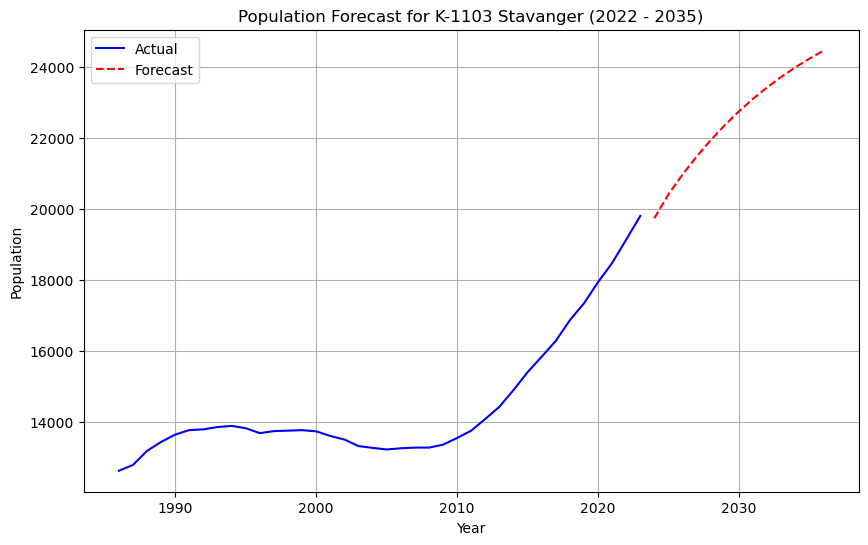

In [247]:


# Assuming 'grouped_elderly' contains your time series data
# Define the region for which to make predictions
region_to_predict = 'K-1103 Stavanger'

# Filter data for the specified region
region_data = grouped_elderly[grouped_elderly['region'] == region_to_predict]

# Prepare the data for ARIMA model
y = region_data['Personer'].values
dates = pd.to_datetime(region_data['år'], format='%Y')

# Fit the ARIMA model (assuming order (1, 1, 0) as identified earlier)
model = sm.tsa.ARIMA(y, order=(1, 1, 0))
model_fit = model.fit()

# Dates for plotting the forecast
# We ensure the forecast starts from 2019
forecast_start_year = 2023
forecast_start_index = forecast_start_year - dates.iloc[0].year

# Make predictions for 2019-2023
forecast = model_fit.predict(start=forecast_start_index, end=forecast_start_index + 12, typ='levels')

# Generate dates for the forecast period
forecast_dates = pd.date_range(start=pd.to_datetime(forecast_start_year, format='%Y'), 
                               periods=len(forecast), 
                               freq='Y')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dates, y, color='blue', label='Actual')
plt.plot(forecast_dates, forecast, color='red', linestyle='dashed', label='Forecast')



plt.title(f'Population Forecast for {region_to_predict} (2022 - 2035)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()



In [248]:
import pandas as pd
import statsmodels.api as sm

# Assuming 'grouped_elderly' contains your time series data
all_forecasts = {}  # Dictionary to store all forecasts

# Iterate over each region except 'K-0301 Oslo'
for region in grouped_elderly['region'].unique():
    if region == 'K-0301 Oslo':
        continue  # Skip Oslo

    # Filter data for the current region
    region_data = grouped_elderly[grouped_elderly['region'] == region]

    # Prepare the data for ARIMA model
    y = region_data['Personer'].values
    dates = pd.to_datetime(region_data['år'], format='%Y')

    # Fit the ARIMA model (assuming order (1, 1, 0))
    model = sm.tsa.ARIMA(y, order=(1, 1, 0))
    model_fit = model.fit()

    # Forecasting from 2023 to 2035
    forecast_start_year = 2023
    forecast_end_year = 2035
    forecast_length = forecast_end_year - forecast_start_year + 1
    forecast_start_index = forecast_start_year - dates.iloc[0].year

    # Make predictions
    forecast = model_fit.predict(start=forecast_start_index, end=forecast_start_index + forecast_length - 1, typ='levels')

    # Generate dates for the forecast period
    forecast_dates = pd.date_range(start=pd.to_datetime(forecast_start_year, format='%Y'), 
                                   periods=forecast_length, 
                                   freq='Y')

    # Store the forecast in the dictionary
    all_forecasts[region] = {year.strftime('%Y'): value for year, value in zip(forecast_dates, forecast)}

# Optionally, print or return the forecast dictionary
print(all_forecasts)


{'K-1103 Stavanger': {'2023': 19743.82592067744, '2024': 20418.131849911762, '2025': 20974.416123640287, '2026': 21482.437815893776, '2027': 21946.384132531966, '2028': 22370.079002267452, '2029': 22757.014594171647, '2030': 23110.380100758313, '2031': 23433.088023879965, '2032': 23727.798180090274, '2033': 23996.939623328908, '2034': 24242.73066561957, '2035': 24467.197160795356}, 'K-1106 Haugesund': {'2023': 6018.891485965075, '2024': 6210.774958438213, '2025': 6364.925745860272, '2026': 6510.0179228905345, '2027': 6646.583815205713, '2028': 6775.124466573506, '2029': 6896.111477121673, '2030': 7009.988733581958, '2031': 7117.174037856906, '2032': 7218.060639884588, '2033': 7313.0186804251425, '2034': 7402.396549062518, '2035': 7486.522162403795}, 'K-1506 Molde': {'2023': 6105.763019317801, '2024': 6359.318878869147, '2025': 6526.366211955748, '2026': 6685.532250840662, '2027': 6837.188835032759, '2028': 6981.690260650602, '2029': 7119.374108119698, '2030': 7250.562030819005, '2031':

/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown

/var/folders/dg/64b0p1yx17dgtv62qtpnxhm00000gn/T/ipykernel_82420/1620939104.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['år'] = pd.to_datetime(filtered_data['år'], format='%Y')
/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


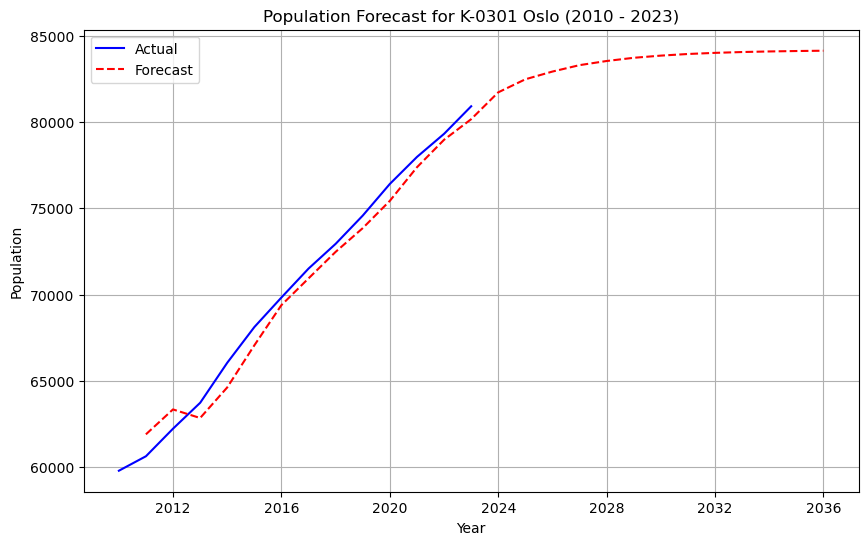

In [249]:


# Assuming 'grouped_elderly' contains your time series data
region_to_predict = 'K-0301 Oslo'
start_year = 2010

# Filter data for the specified region and starting from 2010
filtered_data = grouped_elderly[(grouped_elderly['region'] == region_to_predict) &
                                (grouped_elderly['år'] >= start_year)]

# Convert 'år' to datetime for better plotting
filtered_data['år'] = pd.to_datetime(filtered_data['år'], format='%Y')

# Prepare the data for ARIMA model
y = filtered_data['Personer'].values
dates = filtered_data['år']

# Fit the ARIMA model (assuming order (2, 1, 0) as identified earlier)
model = sm.tsa.ARIMA(y, order=(2, 1, 0))
model_fit = model.fit()

# Make predictions from 2010 to 2023
forecast = model_fit.predict(start=1, end=len(y) + 12, typ='levels')

# Generate dates for the forecast period
forecast_dates = pd.date_range(start=dates.iloc[0], periods=len(forecast), freq='Y')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dates, y, color='blue', label='Actual')
plt.plot(forecast_dates, forecast, color='red', linestyle='dashed', label='Forecast')

plt.title(f'Population Forecast for {region_to_predict} (2010 - 2023)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


In [250]:
import pandas as pd
import statsmodels.api as sm

# Assuming 'grouped_elderly' contains your time series data
Oslo_forecasts = {}  # Dictionary to store all forecasts

# Add forecasts for all regions except Oslo
# (Rest of the code remains the same as in the previous example)

# Now, add the forecast for Oslo
region_to_predict = 'K-0301 Oslo'
start_year = 2010

# Filter data for the specified region and starting from 2010
filtered_data = grouped_elderly[(grouped_elderly['region'] == region_to_predict) &
                                (grouped_elderly['år'] >= start_year)]

# Prepare the data for ARIMA model
y = filtered_data['Personer'].values
dates = pd.to_datetime(filtered_data['år'], format='%Y')

# Fit the ARIMA model (assuming order (2, 1, 0))
model = sm.tsa.ARIMA(y, order=(2, 1, 0))
model_fit = model.fit()

# Make predictions from 2010 to 2023
forecast = model_fit.predict(start=1, end=len(y) + 12, typ='levels')

# Generate dates for the forecast period
forecast_dates = pd.date_range(start=dates.iloc[0], periods=len(forecast), freq='Y')

# Store the forecast for Oslo in the dictionary
oslo_forecast = {year.strftime('%Y'): value for year, value in zip(forecast_dates, forecast)}
Oslo_forecasts[region_to_predict] = oslo_forecast

# Optionally, print or return the forecast dictionary
print(Oslo_forecasts)


{'K-0301 Oslo': {'2010': 61908.51003178567, '2011': 63352.10693863599, '2012': 62854.85405731145, '2013': 64626.22608135317, '2014': 67060.64478152692, '2015': 69391.22058982502, '2016': 70941.79014513752, '2017': 72477.85840896482, '2018': 73850.77165783232, '2019': 75429.89827586534, '2020': 77376.98500021038, '2021': 78967.89771676979, '2022': 80160.46364925992, '2023': 81716.25647389694, '2024': 82473.72599605208, '2025': 82921.1082865171, '2026': 83292.8587239018, '2027': 83532.32796361485, '2028': 83718.45994327405, '2029': 83844.26051254719, '2030': 83938.54738164724, '2031': 84003.98748157504, '2032': 84052.06678534667, '2033': 84085.92887571269, '2034': 84110.53692347763, '2035': 84128.00881259024}}


/Users/lime/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [251]:
# Remove specific forecast entries for 'K-0301 Oslo' from the years 2010 to 2022
years_to_remove = [str(year) for year in range(2010, 2023)]
for year in years_to_remove:
    if year in Oslo_forecasts['K-0301 Oslo']:
        del Oslo_forecasts['K-0301 Oslo'][year]

# Optionally, print or return the updated forecast dictionary
print(Oslo_forecasts)


{'K-0301 Oslo': {'2023': 81716.25647389694, '2024': 82473.72599605208, '2025': 82921.1082865171, '2026': 83292.8587239018, '2027': 83532.32796361485, '2028': 83718.45994327405, '2029': 83844.26051254719, '2030': 83938.54738164724, '2031': 84003.98748157504, '2032': 84052.06678534667, '2033': 84085.92887571269, '2034': 84110.53692347763, '2035': 84128.00881259024}}


Grouped Elderly MMM Data:
  Municipality       Year Personer
0    0301 Oslo 2022-01-01    79316
1    0301 Oslo 2023-01-01    81341
2    0301 Oslo 2024-01-01    83534
3    0301 Oslo 2025-01-01    85864
4    0301 Oslo 2026-01-01    88279

All Forecasts:
{'K-1103 Stavanger': {'2023': 19743.82592067744, '2024': 20418.131849911762, '2025': 20974.416123640287, '2026': 21482.437815893776, '2027': 21946.384132531966, '2028': 22370.079002267452, '2029': 22757.014594171647, '2030': 23110.380100758313, '2031': 23433.088023879965, '2032': 23727.798180090274, '2033': 23996.939623328908, '2034': 24242.73066561957, '2035': 24467.197160795356}, 'K-1106 Haugesund': {'2023': 6018.891485965075, '2024': 6210.774958438213, '2025': 6364.925745860272, '2026': 6510.0179228905345, '2027': 6646.583815205713, '2028': 6775.124466573506, '2029': 6896.111477121673, '2030': 7009.988733581958, '2031': 7117.174037856906, '2032': 7218.060639884588, '2033': 7313.0186804251425, '2034': 7402.396549062518, '2035': 7486.522

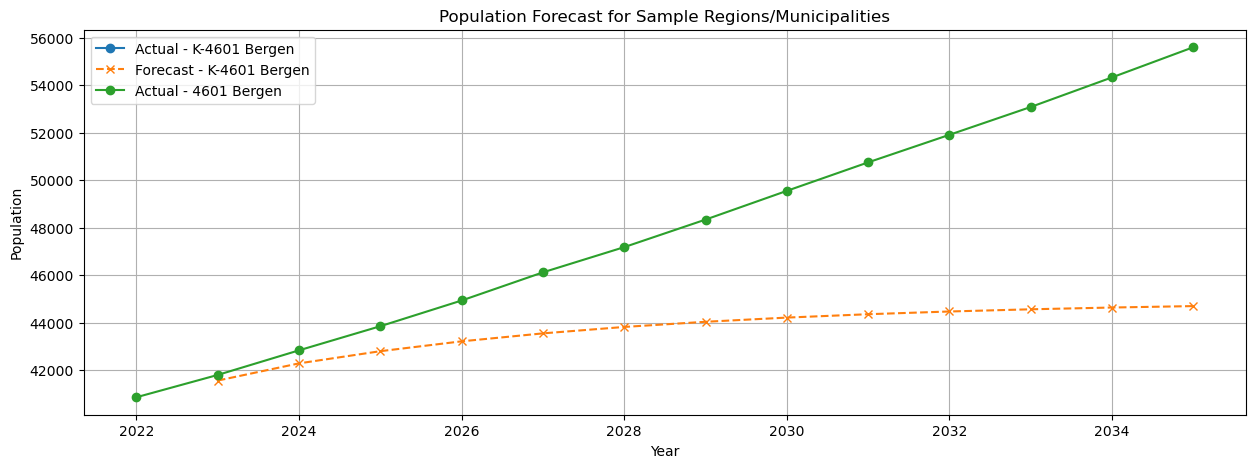

In [252]:
## Import necessary libraries


# Convert 'Year' to datetime for better plotting
grouped_elderlyMMM['Year'] = pd.to_datetime(grouped_elderlyMMM['Year'], format='%Y')

# Print the head of the grouped elderly data
print("Grouped Elderly MMM Data:")
print(grouped_elderlyMMM.head())

# Print the forecasts dictionary
print("\nAll Forecasts:")
print(all_forecasts)

# Selecting 3 sample regions/municipalities
sample_regions = ['K-4601 Bergen', '4601 Bergen']  # Replace 'Another Region' with the actual region name

# Plotting
plt.figure(figsize=(15, 5))

for region in sample_regions:
    # Plot actual data
    actual_data = grouped_elderlyMMM[grouped_elderlyMMM['Municipality'] == region]
    plt.plot(actual_data['Year'], actual_data['Personer'], label=f'Actual - {region}', marker='o')

    # Plot forecasted data
    forecast_data = all_forecasts.get(region, {})
    if forecast_data:
        years = [pd.to_datetime(year, format='%Y') for year in forecast_data.keys()]
        values = list(forecast_data.values())
        plt.plot(years, values, label=f'Forecast - {region}', linestyle='--', marker='x')

plt.title('Population Forecast for Sample Regions/Municipalities')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


In [253]:
The results from your Linear Regression models, trained on data starting from different years and predicting for 2021 and 2022, show varying performance. You've noticed that the model starting in 2009 gives the best R2 score, indicating a strong fit for that particular time frame. However, predicting up to 2035 based on a model trained only to predict one or two years ahead (2021 and 2022) does have limitations.

Considerations for Long-Term Forecasting:
Short-Term vs. Long-Term Forecasting: A model that performs well in predicting the immediate next one or two years might not necessarily perform equally well in long-term forecasting (like up to 2035). This is because long-term forecasts are more susceptible to changes in trends, external factors, and other unforeseen variables.

Changing Dynamics Over Time: Demographic trends can change due to a variety of factors like policy changes, economic conditions, health trends, etc. A model trained on data up to 2022 might not capture these future changes effectively.

Data Availability and Model Complexity: More recent data might be more representative of current trends, but it also means less data is available for training, which can affect the model's ability to generalize. Complex models might capture more nuances but also risk overfitting to recent trends.


Recommendations:
Combining Short-Term and Long-Term Models: Consider using short-term models for immediate forecasting and different models, possibly more complex or incorporating additional variables, for long-term forecasting.

Scenario Analysis: Since long-term forecasts are uncertain, it might be helpful to create several scenarios based on different assumptions about future trends and changes.

Regular Updates and Validation: Regularly updating the models with new data and validating their predictions against actual developments can help ensure their continued relevance and accuracy.

Consultation with Domain Experts: For long-term demographic forecasting, consulting with experts in the field can provide insights into potential future trends and factors to consider in your models.

In summary, while the model trained with data starting from 2009 shows good performance for short-term predictions, caution should be exercised in extrapolating these results too far into the future. A combination of different modeling approaches, along with regular updates and expert consultation, would likely yield the most reliable long-term forecasts.








SyntaxError: unterminated string literal (detected at line 1) (4104248594.py, line 1)

In [262]:
first_file_path = 'future_predictions_all_models.csv'
data_first= pd.read_csv(first_file_path)

# Display the first few rows of the dataframe
data_first.head()

,Region,Fagutdanning,Year,Predicted_Workforce
0,K.3802 Holmestrand,Lege,2023,29.976274
1,K.3802 Holmestrand,Lege,2024,29.442328
2,K.3802 Holmestrand,Lege,2025,28.777116
3,K.3802 Holmestrand,Lege,2026,27.980637
4,K.3802 Holmestrand,Lege,2027,27.052891


In [267]:
second_file_path = 'updated_forecasts_2023_to_2030.csv'
data_second = pd.read_csv(second_file_path)

# Display the first few rows of the dataframe
data_second.head()

,Region,Year,Forecast
0,K-1103 Stavanger,2023,19762.646651
1,K-1103 Stavanger,2024,20473.377549
2,K-1103 Stavanger,2025,21138.614754
3,K-1103 Stavanger,2026,21803.570158
4,K-1103 Stavanger,2027,22468.617938


In [268]:



# Replace with your file paths
first_file_path = 'future_predictions_all_models.csv'
second_file_path = 'updated_forecasts_2023_to_2030.csv'

data_first = pd.read_csv(first_file_path)
data_second = pd.read_csv(second_file_path)

data_second['Region'] = data_second['Region'].str.replace('-', '.').str.strip()

merged_data = pd.merge(data_first, data_second, on=['Region', 'Year'])

filtered_data = merged_data[merged_data['Fagutdanning'] != 'Omsorgsarbeider']
filtered_data = filtered_data[filtered_data['Predicted_Workforce'] > 0]

filtered_data['Log_Predicted_Workforce'] = np.log(filtered_data['Predicted_Workforce'])
filtered_data['Log_Forecast'] = np.log(filtered_data['Forecast'])

# Proceed with your regression analysis




In [270]:

X = sm.add_constant(filtered_data['Log_Forecast'])

# Setting the dependent variable
y = filtered_data['Log_Predicted_Workforce']

# Performing the regression using OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

# Display the regression summary
print(model.summary())


                               OLS Regression Results                              
Dep. Variable:     Log_Predicted_Workforce   R-squared:                       0.957
Model:                                 OLS   Adj. R-squared:                  0.954
Method:                      Least Squares   F-statistic:                     314.4
Date:                     Wed, 29 Nov 2023   Prob (F-statistic):           5.47e-11
Time:                             15:01:07   Log-Likelihood:                 42.857
No. Observations:                       16   AIC:                            -81.71
Df Residuals:                           14   BIC:                            -80.17
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

/Users/lime/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [273]:
example_data = filtered_data[(filtered_data['Fagutdanning'] == 'Lege') & 
                             (filtered_data['Region'] == 'K.0301 Oslo')]

# Adding a constant term for the intercept
X = sm.add_constant(example_data['Log_Forecast'])

# Setting the dependent variable
y = example_data['Log_Predicted_Workforce']

# Performing the regression
model = sm.OLS(y, X).fit()

# Extracting the elasticity coefficient
elasticity_coefficient = model.params['Log_Forecast']

print(f"Elasticity Coefficient for ExampleProfession in ExampleRegion:

SyntaxError: unterminated string literal (detected at line 16) (2403189775.py, line 16)

In [272]:
# Check unique values in the 'Region' column in data_first
print("Unique Regions in data_first:")
print(data_first['Region'].unique())

# Check unique values in the 'Region' column in data_second
print("\nUnique Regions in data_second:")
print(data_second['Region'].unique())


Unique Regions in data_first:
['K.3802 Holmestrand' 'K.3033 Ullensaker']

Unique Regions in data_second:
['K.1103 Stavanger' 'K.1106 Haugesund' 'K.1506 Molde' 'K.3007 Ringerike'
 'K.3029 Lørenskog' 'K.3030 Lillestrøm' 'K.3407 Gjøvik'
 'K.3802 Holmestrand' 'K.3803 Tønsberg' 'K.3806 Porsgrunn' 'K.3807 Skien'
 'K.4204 Kristiansand' 'K.5401 Tromsø' 'K.0301 Oslo'
 'K.5001 Trondheim . Tråante' 'K.4601 Bergen' 'K.3005 Drammen'
 'K.1833 Rana' 'K.3033 Ullensaker' 'K.3002 Moss']


In [ ]:
# Check data types and formatting of 'Region' and 'Year' columns in data_first
print("Data Types and Formatting in data_first:")
print(data_first[['Region', 'Year']].dtypes)

# Check data types and formatting of 'Region' and 'Year' columns in data_second
print("\nData Types and Formatting in data_second:")
print(data_second[['Region', 'Year']].dtypes)
